<a href="https://colab.research.google.com/github/joabodera/datascience-projects/blob/main/Food_Safety_and_Nutrition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [72]:
# prompt: import excel from google drive titled Afox Household_Survey_14.3.2023

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Replace 'Afox Household_Survey_14.3.2023.xlsx' with the actual file name
df = pd.read_csv('/content/drive/MyDrive/Household_Survey.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!ls "/content/drive/MyDrive/Household_Survey.csv"

/content/drive/MyDrive/Household_Survey.csv


In [10]:
# prompt: import all columns from file including:

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Household_Survey.csv', usecols=df.columns)
'''
start,end,today,1. Questionnaire ID,2. Name of respondent,3. Date of the interview,4. Enumerator’s’ Name,5. Kamukunji Sub County,6. Village,7. Household number,8. Socio-Demographic Characteristics,9. Phone number of respondent,10. Gender of respondent,11a. Age of the respondent,12. Occupation?,66=Other (specify),Employed (specify),Small business (specify),13. What is the Estimated total monthly income of your household (Kshs)?,14. Who manages the above income?,66=Other (specify),15. Education level,16. Can you read?,17. Is respondent the household head?,18. If the respondent is not HHH who is the household head,If other specify?,19. What is the occupation of the household head,Employed (specify),Small business specify,66=Other (specify),20. Marital status of the respondent,99. Other (specify),"21.  If married, age of spouse (if polygamous Spouse in the HH)",22. Nationality of household?,66=Other (Specify),23. What is the ethnicity of this household,Other specify (ethnicity),24. Religion of the household,Other specify (Religion),25a . Is any member of the household a member of any organization or association or government program involved in food production and /nutrition activities. If yes,b. If yes give the name of the association),c. HH member involved,26. What is the biggest concern for people in this village?,Other specify (biggest concern),27. What is the total number of household members?,28. Number of children,28 b. Number of children under 5 years,28 c. Number of children over 5 years. (5 - 10 years),29. Number of teenagers (11-17 years),30. Number of adults (18 years and above),31 a. What is the name nearest health facility?,31b. What is the walking distance to the nearest health facility as in a above?,31c. What is the time taken to the nearest health facility as in a above?,32. Which is your first stop for health care for you / any member of your household?,"33. How much amount does your household spend on regular (food,water, rent, transportation) expenses per month? ",34. Does anyone in this household own/ use any of the following items [tick all that apply),34. Does anyone in this household own/ use any of the following items [tick all that apply)/1=Electricity in the house,34. Does anyone in this household own/ use any of the following items [tick all that apply)/2=Radio,34. Does anyone in this household own/ use any of the following items [tick all that apply)/3=TV,34. Does anyone in this household own/ use any of the following items [tick all that apply)/4=Solar panel,34. Does anyone in this household own/ use any of the following items [tick all that apply)/5=Mobile phone,34. Does anyone in this household own/ use any of the following items [tick all that apply)/6=Bicycle,34. Does anyone in this household own/ use any of the following items [tick all that apply)/7=Motorcycle,34. Does anyone in this household own/ use any of the following items [tick all that apply)/8=Car,34. Does anyone in this household own/ use any of the following items [tick all that apply)/9=Mobile phone,34. Does anyone in this household own/ use any of the following items [tick all that apply)/10=Refrigerator,34. Does anyone in this household own/ use any of the following items [tick all that apply)/11=Watch,34. Does anyone in this household own/ use any of the following items [tick all that apply)/99=Don’t know/ none,34. Does anyone in this household own/ use any of the following items [tick all that apply)/9=Refrigerator,34. Does anyone in this household own/ use any of the following items [tick all that apply)/10=Watch,35. Does the house have electricity connection,33. What fuel is mainly used for cooking food?,Specify other source of fuel,34. Are you the owners of the house?,35. How many rooms do you have in your house?,39. Water Handling and hygiene:,40. Is water available in the house?,"41. If no, how much time does it take you or any other household member to walk to and from the nearest drinking water source, including time required to queue and fill the containers?","42. What is the kind of water source nearest to you/mentioned above? (Do not read out, fill in as said by participant)",42b. 66=Other (Specify),43. What is the main source of drinking water for members of your household?,66=Other (Specify),45. What is the main source of bathing and laundry water for members of your household?,66=Other (Specify),46. Is your main drinking water source functioning now?,"47. If main drinking water source needed repairs, how confident are you that the problem could be fixed within 1 (one) week?","48. In the last 6 months, were there any times when water from main drinking water source was not available for more than one week?",49a. a. How many days did the interruption last?,49b. What was the alternative source of water during the interruption?,50. How much water do you use in a day (litres),66= Other (Specify),51. How do you perceive the taste of drinking water from your main drinking water source right now? (ENUMERATOR Do not read out),52. How safe do you think your main drinking water source is for drinking? (ENUMERATOR Do not read out),53. What do you think could make your water unsafe for drinking?,66= Other (specify),54. Which methods for water treatment do you know?,54. Which methods for water treatment do you know?/1=Boiling,54. Which methods for water treatment do you know?/2=Purifying using water purifying agent,54. Which methods for water treatment do you know?/3=Use of Filter,54. Which methods for water treatment do you know?/4= Bought purified water,54. Which methods for water treatment do you know?/66=Others (specify),54. Which methods for water treatment do you know?/99= Don't know,66=Others (specify),55. Can you explain to me the procedures of the different methods (the ones the interviewee knows) for water treatment? Let the person explain the different methods for water treatment,56. Do you use any method to treat your drinking water?,57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?,66=Others (specify)_,58. Who in your family is mainly responsible for water treatment?,66= Other,59. How often did you treat your drinking water in the past 2 weeks?,60. How much do you like or dislike drinking treated water?,61. Do you think that treating your drinking water is important?,"62. How sure are you that you can always treat your water before drinking, even if this may be difficult sometimes?",63. How important is it for you to treat your water before drinking,64. How true is the following statement for you? Treating my drinking water is something I do automatically.,65. What kind of containers do you use to collect & transport water from the source? [Tick all that apply],65. What kind of containers do you use to collect & transport water from the source? [Tick all that apply]/1=Jerrycan,65. What kind of containers do you use to collect & transport water from the source? [Tick all that apply]/2=Bucket,65. What kind of containers do you use to collect & transport water from the source? [Tick all that apply]/3=Basin,65. What kind of containers do you use to collect & transport water from the source? [Tick all that apply]/4=Bottle,65. What kind of containers do you use to collect & transport water from the source? [Tick all that apply]/5=Saucepan,65. What kind of containers do you use to collect & transport water from the source? [Tick all that apply]/6=Drums,65. What kind of containers do you use to collect & transport water from the source? [Tick all that apply]/66= other (specify),66= other (specify),66. Do you clean your container for transport?,67. How often do you clean the container used for transport of water?,68. How do you clean the container used for transport of water,69. Do you use the same container for water transport and water storage?,70. What kind of containers do you use to store the drinking water?,66=Other (Specify),71. Do you clean your container for storage?,72. How often do you clean your safe storage container?,73. How do you clean your safe storage container?,74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply),74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply)/1=When they look dirty,74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply)/2=After going to toilet,74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply)/3=After handling garbage,74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply)/4=After cleaning baby’s bottom,74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply)/5=Before eating,74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply)/6=Before cooking,74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply)/7=There are no special occasions,74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply)/8=Never,74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply)/66= Other (Specify),74. During which times did you wash your hands yesterday? Do not read out answer (Tick all that apply)/99=Don’t know/ none,66 = Other specify,75a. Please show me the soap you have in the household.,75b. Is soap available for hand washing?,"76. What type of soap is available? [Soap does not include ash, soil, sand, or other hand washing agents] Tick all that apply","76. What type of soap is available? [Soap does not include ash, soil, sand, or other hand washing agents] Tick all that apply/1= Bar soap ","76. What type of soap is available? [Soap does not include ash, soil, sand, or other hand washing agents] Tick all that apply/2= Identified liquid soap ","76. What type of soap is available? [Soap does not include ash, soil, sand, or other hand washing agents] Tick all that apply/3= Powder detergent","76. What type of soap is available? [Soap does not include ash, soil, sand, or other hand washing agents] Tick all that apply/4= Unidentified liquid soap ","76. What type of soap is available? [Soap does not include ash, soil, sand, or other hand washing agents] Tick all that apply/5= unidentified solid soap","76. What type of soap is available? [Soap does not include ash, soil, sand, or other hand washing agents] Tick all that apply/6=Unidentified brown soap","76. What type of soap is available? [Soap does not include ash, soil, sand, or other hand washing agents] Tick all that apply/7=unidentified coloured soap","76. What type of soap is available? [Soap does not include ash, soil, sand, or other hand washing agents] Tick all that apply/8=unidentified local soap",77. Where do you and your household members (excluding children under 5 years) usually go to defecate?,77b. Communal latrine,77 c. 66=Other (Specify),78. What is the condition/status of the toilet? (ask to see the toilet),66= Other (specify),79. How often do you clean the toilet / latrine,80. How many people share the toilet / latrine,81. Who buys the food for the family,82. Who cooks the food for the family?,82 a) Where do you buy food for the family  [Tick all that apply],82 a) Where do you buy food for the family  [Tick all that apply]/1=Small kiosk,82 a) Where do you buy food for the family  [Tick all that apply]/2= Open air Market,"82 a) Where do you buy food for the family  [Tick all that apply]/3= Closed Market, ",82 a) Where do you buy food for the family  [Tick all that apply]/4=Open wooden makeshift (kibanda),82 a) Where do you buy food for the family  [Tick all that apply]/5=Supermarket,82 a) Where do you buy food for the family  [Tick all that apply]/66= Other(s)_ Specify,66= Other(s)_ Specify,82 b) What is the walking distance to the nearest Kiosk?,82 c) What is the walking time taken to the nearest Kiosk?,82 d) What is the walking distance to the nearest other food facility / shop?,82 e) What is the walking time taken to the nearest other food facility / shop?,82 f) What is the walking distance to the nearest Market (open and closed)?,82 g) What is the walking time taken to the nearest Market (open and closed)?,83. What types of food do you buy from the Kiosk? [Tick all that apply],"83. What types of food do you buy from the Kiosk? [Tick all that apply]/1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes)",83. What types of food do you buy from the Kiosk? [Tick all that apply]/2= Vegetables,83. What types of food do you buy from the Kiosk? [Tick all that apply]/3= Milk,83. What types of food do you buy from the Kiosk? [Tick all that apply]/4= Fruits,83. What types of food do you buy from the Kiosk? [Tick all that apply]/5=Sugar/ salt/cooking oil,83. What types of food do you buy from the Kiosk? [Tick all that apply]/66=Other (specify,66=Other (specify),83 a) What types of food do you buy from the supermarket? [Tick all that apply],"83 a) What types of food do you buy from the supermarket? [Tick all that apply]/1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes)",83 a) What types of food do you buy from the supermarket? [Tick all that apply]/2= Vegetables,83 a) What types of food do you buy from the supermarket? [Tick all that apply]/3= Milk,83 a) What types of food do you buy from the supermarket? [Tick all that apply]/4= Fruits,83 a) What types of food do you buy from the supermarket? [Tick all that apply]/5=Sugar/ salt/cooking oil,83 a) What types of food do you buy from the supermarket? [Tick all that apply]/66=Other (specify),66=Other (specify),83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply],"83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes)",83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/2= Vegetables,83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/3= Milk,83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/4= Fruits,83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/5=Sugar/ salt/cooking oil,83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/66=Other (specify),83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/1= Starchy staple foods,"83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/2= Beans, peas/ lentils",83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/3. Nuts or seeds,83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/4= Dairy products,83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/5= Meat or fish,83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/6 = Eggs,83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/7 = Leafy green vegetables,83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]/66=Other vegetables (specify),66=Other (specify),83 c) What types of food do you buy from Other areas? [Tick all that apply],"83 c) What types of food do you buy from Other areas? [Tick all that apply]/1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes)",83 c) What types of food do you buy from Other areas? [Tick all that apply]/2= Vegetables,83 c) What types of food do you buy from Other areas? [Tick all that apply]/3= Milk,83 c) What types of food do you buy from Other areas? [Tick all that apply]/4= Fruits,83 c) What types of food do you buy from Other areas? [Tick all that apply]/5=Sugar/ salt/cooking oil,83 c) What types of food do you buy from Other areas? [Tick all that apply]/66=Other (specify),83 c) What types of food do you buy from Other areas? [Tick all that apply]/1= Starchy staple foods,"83 c) What types of food do you buy from Other areas? [Tick all that apply]/2= Beans, peas/ lentils",83 c) What types of food do you buy from Other areas? [Tick all that apply]/3. Nuts or seeds,83 c) What types of food do you buy from Other areas? [Tick all that apply]/4= Dairy products,83 c) What types of food do you buy from Other areas? [Tick all that apply]/5= Meat or fish,83 c) What types of food do you buy from Other areas? [Tick all that apply]/6 = Eggs,83 c) What types of food do you buy from Other areas? [Tick all that apply]/7 = Leafy green vegetables,83 c) What types of food do you buy from Other areas? [Tick all that apply]/66=Other vegetables (specify),66=Other (specify),84. Place of food preparation,85. Frequency of cleaning cooking environment,86. Method of refuse disposal,7. Other options (specify),87. General refuse dump,66=other (specify),88. a. Government involvement in environmental sanitation,"88 b. If yes, specify",89. Thorough boiling of food before consumption,90. Reheat of previously cooked food,91. Food storage/preservation,92. Do you check  expiry date of packaged foods?,"93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?","94. If yes, Where? ",66=Other (Specify),"95. Did the information on water, hygiene and sanitation change your behaviour?","96. Which behaviour did you change after your received information on water treatment and hygiene? Do not read out, listen to explanation and tick applicable boxes","96. Which behaviour did you change after your received information on water treatment and hygiene? Do not read out, listen to explanation and tick applicable boxes/1=I purchased a product for water treatment","96. Which behaviour did you change after your received information on water treatment and hygiene? Do not read out, listen to explanation and tick applicable boxes/2=I am now regularly treating water","96. Which behaviour did you change after your received information on water treatment and hygiene? Do not read out, listen to explanation and tick applicable boxes/3= I am now sometimes treating water I installed a hand washing station","96. Which behaviour did you change after your received information on water treatment and hygiene? Do not read out, listen to explanation and tick applicable boxes/4=I do wash my hands more often","96. Which behaviour did you change after your received information on water treatment and hygiene? Do not read out, listen to explanation and tick applicable boxes/5=I use soap to wash my hands","96. Which behaviour did you change after your received information on water treatment and hygiene? Do not read out, listen to explanation and tick applicable boxes/6=I wash my hands at the critical times","96. Which behaviour did you change after your received information on water treatment and hygiene? Do not read out, listen to explanation and tick applicable boxes/7=I regularly disinfect the water storage container with chlorine ","96. Which behaviour did you change after your received information on water treatment and hygiene? Do not read out, listen to explanation and tick applicable boxes/8=I regularly wash the water storage container with soap","96. Which behaviour did you change after your received information on water treatment and hygiene? Do not read out, listen to explanation and tick applicable boxes/9=Other behaviour changed",97.  Cleaning of cooking utensils before and after use,98. I wash food before cooking to remove the bodily sweat,99. I wash food before cooking to remove possible faecal contaminants,100. I wash food before cooking to clear foul smell,101. I wash food before cooking to clear sticky substance on the surface,102. It is important to wash hands before handling food after visiting the toilet/latrine,103. It is important to wash hands before handling food after handling garbage,104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking,105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking,106. I do separate raw food from cooked foods,"107. When I prepare fresh fruits and vegetables for myself, I thoroughly rinse the fruits and vegetables under running tap water, including those with skins and rinds that are not eaten",108. My child(ren) wash their hands with soap and running water right before eating a snack or meal,"109. After playing, my child(ren) wash their hands with soap and water before eating",110. The food for under 5yrs cooked differently from the rest of the family,111. Is all the food cooked in the house?,112. Any types of cooked food that are bought?,112. Any types of cooked food that are bought? /1=Cereals/ legumes,112. Any types of cooked food that are bought? /2= Mandazi/ bread/ cakes/chapati,112. Any types of cooked food that are bought? /3=Tea / porridge/milk,112. Any types of cooked food that are bought? /4=Vegetables,112. Any types of cooked food that are bought? /66=Other-specify,112. Any types of cooked food that are bought? /1=Starchy staple food,112. Any types of cooked food that are bought? /2= Beans/ peas/ lentils,112. Any types of cooked food that are bought? /3=Nuts or seeds,112. Any types of cooked food that are bought? /4=Dairy products,112. Any types of cooked food that are bought? /5= Meat or fish,112. Any types of cooked food that are bought? /6= Eggs,112. Any types of cooked food that are bought? /7= Leafy green vegetables,112. Any types of cooked food that are bought? /66=Other vegetables (specify),112. Specify other vegetables,113. Basic information about the reference child,113 a. First Name of child,113 b. Sex of child,113 c. Date of birth,113 d. Weight in kilograms at birth,113 e. Age in Months,113 f. Age in years,114.  Nutrition status and Health status of child,114 a). What is the immunization and vitamin A supplementation status of your child (confirm with information on health card)?,114 b. Is health-card available?,"114 c. If child is not immunized and/or not supplemented, the reason",66= other (specify),115 a) Is the child currently breastfeeding,115 b) If NO up till what age (in months) was the child breastfed?,115 d) If NO up till what age (in years) was the child breastfed?,116. Oedema: Check for signs personally,"Oedema: check to see if the skin appears stretched and shiny. Using the forefinger, press the swollen area gently for about 10 seconds, when a dimple/depression appears and takes about 15 seconds to fill there, is oedema",117. Type of oedema,118. Skin condition,119. Hair condition,Sick-day health questions,120. Ask whether the child had manifested any of the symptoms below in the last 4 weeks (one month) and if yes get the frequency and information on whether the child was taken to hospital,120 a) Symptom,ab) Types of symptom,ab) Types of symptom /1= Fever/high temperature,ab) Types of symptom /2= Diarrhoea,ab) Types of symptom /3= Cough,ab) Types of symptom /4= Flu/ Upper respiratory infections,ab) Types of symptom /5=Vomiting,ab) Types of symptom /6= Difficulty in breathing,ab) Types of symptom /7= Poor food intake (Loss of appetite),ab) Types of symptom /8= Painful/swollen eyes,ab) Types of symptom /9= Constipation,ab) Types of symptom /66=Other (specify),66=Other (specify),120 b) Frequency,120 c) Did you seek medical advice for the condition/illness of your child?,120 d) Source of treatment,66=Other (specify),120 e) If No. Why did you not seek medical advice?,120 f) Who decided what to do when the child falls ill,66=Other (specify),121. What are the three most common illness the child has experienced in the last month?,"122. What are the causes for diarrheal diseases? Let the respondent explain the Cause, tick the selection which matches the explanation best","122. What are the causes for diarrheal diseases? Let the respondent explain the Cause, tick the selection which matches the explanation best/1=Some pathogens ","122. What are the causes for diarrheal diseases? Let the respondent explain the Cause, tick the selection which matches the explanation best/2=Faecal pathogens ","122. What are the causes for diarrheal diseases? Let the respondent explain the Cause, tick the selection which matches the explanation best/3=Dirty hands","122. What are the causes for diarrheal diseases? Let the respondent explain the Cause, tick the selection which matches the explanation best/4=Dirty food","122. What are the causes for diarrheal diseases? Let the respondent explain the Cause, tick the selection which matches the explanation best/5=Dirty water","122. What are the causes for diarrheal diseases? Let the respondent explain the Cause, tick the selection which matches the explanation best/66= Other (Specify)",66= Other (Specify),123. How high or low are the chances that you or your children get sick if you drink untreated water?,"124. Imagine your child below 5 years has diarrhoea, how severe would be the impact on his life and development? On/y read options if answer unclear",125. Have you ever heard of intestinal parasites?,126. What can be done against intestinal parasites (do not prompt),126. What can be done against intestinal parasites (do not prompt)/1=Wash hands with soap,126. What can be done against intestinal parasites (do not prompt)/2=Cut fingernails,"126. What can be done against intestinal parasites (do not prompt)/3=Wear pants, trousers",126. What can be done against intestinal parasites (do not prompt)/4=Wash fruits and vegetables before consumption,126. What can be done against intestinal parasites (do not prompt)/5=Wear shoes,126. What can be done against intestinal parasites (do not prompt)/6=Drink clean water,126. What can be done against intestinal parasites (do not prompt)/7=Take medication,126. What can be done against intestinal parasites (do not prompt)/66=Other (specify),66=Other (specify),127. Does the reference child consume the same type of food as the family? The response does not affect the details below.,128. Did the child eat any food from these food groups for,Breakfast,1. Starchy staple food,Portion in cups,"2. Beans, peas/Lentils",Portion in cups,3. Nuts or seeds,Portion in cups,4. Dairy products,Portion in cups,5. Meat or fish,Portion in cups,6. Eggs,Portion in cups,7. Leafy greens vegetables,Portion in cups,8. Other vegetables,Portion in cups,129. Lunch,1. Starchy staple food,Portion in cups,"2. Beans, peas/Lentils",Portion in cups,3. Nuts or seeds,Portion in cups,5. Meat or fish,Portion in cups,6. Eggs,Portion in cups,7. Dairy products,Portion in cups,7. Leafy greens vegetables,Portion in cups,8. Other vegetables,Portion in cups,130. Supper/Dinner,1. Starchy staple food,Portion in cups,"2. Beans, peas/Lentils",Portion in cup,3. Nuts or seeds,Portion in cups,4. Dairy products,Portion in cups,5. Meat or fish,Portion in cups,6. Eggs,Portion in cups,7. Leafy greens vegetables,Portion in cups,8. Other vegetables,Portion in cups,Take the anthropometric measurements of the index child following standard procedures (one decimal point for all measurements),Measurements,a) Height 4 children (in cm),1st reading,b) 2nd reading,c) 3rd reading,d) Average,b) Weight (in Kg),1st reading,b) 2nd reading,c) 3rd reading,d) Average,c) MUAC (in cm),a) 1st reading,b) 2nd reading,c) 3rd reading,d) Average,132. Child feeding practices,a) Who do you ask for advice when you have questions regarding the feeding of your child?,"a) Who do you ask for advice when you have questions regarding the feeding of your child?/1=Health Professional, Hospital ",a) Who do you ask for advice when you have questions regarding the feeding of your child?/2=Community health worker,a) Who do you ask for advice when you have questions regarding the feeding of your child?/3=Mother,a) Who do you ask for advice when you have questions regarding the feeding of your child?/4=Mother in law,a) Who do you ask for advice when you have questions regarding the feeding of your child?/5=Grandmother,a) Who do you ask for advice when you have questions regarding the feeding of your child?/6=Friend/Neighbour,a) Who do you ask for advice when you have questions regarding the feeding of your child?/66=Other (specify),66=Other (specify),"b) Who mostly feeds this child? Do not read out the list, tick all that apply. ","b) Who mostly feeds this child? Do not read out the list, tick all that apply. /1=Mother ","b) Who mostly feeds this child? Do not read out the list, tick all that apply. /2=Father ","b) Who mostly feeds this child? Do not read out the list, tick all that apply. /3=Sister ","b) Who mostly feeds this child? Do not read out the list, tick all that apply. /4=Brother","b) Who mostly feeds this child? Do not read out the list, tick all that apply. /5=Grandmother","b) Who mostly feeds this child? Do not read out the list, tick all that apply. /6=Friend/Neighbour","b) Who mostly feeds this child? Do not read out the list, tick all that apply. /7=House help ","b) Who mostly feeds this child? Do not read out the list, tick all that apply. /8=Day care","b) Who mostly feeds this child? Do not read out the list, tick all that apply. /66=Other_(Specify)",66=Other (Specify),"c) Who decides what is fed to this child? Do not read out the list, tick all that apply.","c) Who decides what is fed to this child? Do not read out the list, tick all that apply./1=Mother","c) Who decides what is fed to this child? Do not read out the list, tick all that apply./2=Father","c) Who decides what is fed to this child? Do not read out the list, tick all that apply./3=Sister","c) Who decides what is fed to this child? Do not read out the list, tick all that apply./4=Brother","c) Who decides what is fed to this child? Do not read out the list, tick all that apply./5=Grandmother","c) Who decides what is fed to this child? Do not read out the list, tick all that apply./6=House help","c) Who decides what is fed to this child? Do not read out the list, tick all that apply./66=Other (Specify)",66=Other (Specify),d) Do you prepare special foods for your child? (use the last one month as reference period),"e) If YES, why do you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible. ","e) If YES, why do you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible. /1=I have the time","e) If YES, why do you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible. /2=I have information on what to prepare","e) If YES, why do you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible. /3=Child is not old enough to rely on family meals","e) If YES, why do you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible. /66=Other (Specify).",66=Other (Specify).,"f) If NO, why don’t you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible ","f) If NO, why don’t you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible /1=Lack of time","f) If NO, why don’t you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible /2=No food","f) If NO, why don’t you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible /3=Don’t know what to prepare","f) If NO, why don’t you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible /4=Don’t know how to prepare","f) If NO, why don’t you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible /5=Child is old enough to eat family food","f) If NO, why don’t you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible /66=Other (Specify)","f) If NO, why don’t you prepare separate foods for your child? Do not read out the list, probe for further responses. More than one answer is possible /99=Don’t know /none",66=Other (Specify),g) In the past month did you see or hear any message about complementary feeding (for young children?),"h. If yes, where did you see or hear it? Do not read out the list, probe for further responses. More than one answer is possible. ","h. If yes, where did you see or hear it? Do not read out the list, probe for further responses. More than one answer is possible. /1=Health institution","h. If yes, where did you see or hear it? Do not read out the list, probe for further responses. More than one answer is possible. /2=Radio","h. If yes, where did you see or hear it? Do not read out the list, probe for further responses. More than one answer is possible. /3=Television","h. If yes, where did you see or hear it? Do not read out the list, probe for further responses. More than one answer is possible. /4=Religious institution","h. If yes, where did you see or hear it? Do not read out the list, probe for further responses. More than one answer is possible. /66=Other (Specify)",66=Other (Specify),i )Have you ever attended or participated in a cooking demonstration on how to feed a child Under 2 years of age?,133. Did you breastfeed your child?,134. How many months did you breastfeed your child?,135. At what age did you stop breastfeeding your child?,136. Did you feed your child any other liquids or foods during the first six months in addition to mother breastfeeding?,137. After how many months of age did you start to provide additional weaning food to your child?,138. Usually how many meals do your children eat per day?,"139. Do you give your child other things to eat, for example sweets or snacks in addition to the usual meals?",140. What do you give?,"141. Do you give your child any food supplements, for example in addition to the usual meals?",142. What supplements do you give?,143. How many meals per day do the adults in your household eat?,"144. In the past week, can you think about whether your family consumed any of these foods?","Starchy staple food (rice, grain, potato, etc.)","Beans, peas or lentils",Nuts and seeds,"Dairy products (for example milk, yoghurt)",Meat or fish,eggs,Other vegetables,Fruits,145. Did the woman eat any food from these food groups for,Breakfast:,9. Starchy staple food,Portion in grams,"10. Beans, peas/Lentils",Portion in grams,11. Nuts or seeds,Portion in grams,12. Dairy products,Portions in grams,13. Meat or fish,Portion in grams,14. Eggs,Portion in grams,15. Leafy greens vegetables,Portion in grams,16. Other vegetables,Portion in grams,"146. Lunch (For each response that is answered YES, input a command that requires them to indicate the portions) Portions in grams",1. Starchy staple food,Portion in grams,"2. Beans, peas/Lentils",Portions in grams,4. Dairy products,portion in grams,5. Meat or fish,Portion in grams,6. Eggs,Portion in grams,7. Leafy greens vegetables,Portion in grams,8. Other vegetables,Portion in grams,147. Supper/Dinner,9. Starchy staple food,Portion in grams,"10. Beans, peas/Lentils",Portion in grams,11. Nuts or seeds,Portion in grams,12. Dairy products,portions in grams,13. Meat or fish,Portion in grams,14. Eggs,Portion in grams,15. Leafy greens vegetables,Portion in grams,16. Other vegetables,portion in grams,148.Do you have a garden where you get food?,Take the anthropometric measurements of the woman of reproductive age (15-49 years) procedures (one decimal point for all measurements),149. Measurements,a) Height (in cm),a).1st reading,b). 2nd reading,c). 3rd reading,b) Weight (in Kg,a).1st reading,b). 2nd reading,c). 3rd reading,c) MUAC (in cm),a).1st reading,b). 2nd reading,c). 3rd reading,d) Knee height (cm),a).1st reading,b). 2nd reading,c). 3rd reading,e) Waist circumference (cm),a).1st reading,b). 2nd reading,c). 3rd reading,Thank you very much The AFOX Team,THE END,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,_tags,_index,,,,,,
'''


'\nstart,end,today,1. Questionnaire ID,2. Name of respondent,3. Date of the interview,4. Enumerator’s’ Name,5. Kamukunji Sub County,6. Village,7. Household number,8. Socio-Demographic Characteristics,9. Phone number of respondent,10. Gender of respondent,11a. Age of the respondent,12. Occupation?,66=Other (specify),Employed (specify),Small business (specify),13. What is the Estimated total monthly income of your household (Kshs)?,14. Who manages the above income?,66=Other (specify),15. Education level,16. Can you read?,17. Is respondent the household head?,18. If the respondent is not HHH who is the household head,If other specify?,19. What is the occupation of the household head,Employed (specify),Small business specify,66=Other (specify),20. Marital status of the respondent,99. Other (specify),"21.  If married, age of spouse (if polygamous Spouse in the HH)",22. Nationality of household?,66=Other (Specify),23. What is the ethnicity of this household,Other specify (ethnicity),24. Reli

In [11]:
df.head()


,1. Questionnaire ID,2. Name of respondent,3. Date of the interview,4. Enumerator’s’ Name,10. Gender of respondent,11a. Age of the respondent,12. Occupation?,13. What is the Estimated total monthly income of your household (Kshs)?,14. Who manages the above income?,66=Other (specify),...,_validation_status,_notes,_status,_submitted_by,_tags,_index,Unnamed: 565,Unnamed: 566,Unnamed: 567,Unnamed: 568
0,1,Halima Chechen Adhiambo,13072021,Nicole,1. Woman,37,99=Don't_know/_none,1= 0-2500,1=Female HH,NaN,...,Approved,NaN,submitted_via_web,afox,NaN,32,1.0,NaN,NaN,NaN
1,2,Janet Mutinda Kimeu,13072021,Nicole,1. Woman,27,3=Small business (specify),"5= Greater than 10,000",2=Male HH,NaN,...,Approved,NaN,submitted_via_web,afox,NaN,34,1.0,NaN,NaN,NaN
2,3,Charity Syombua,13072021,Jeremiah,1. Woman,29,99=Don't_know/_none,2= 2501-5500,2=Male HH,NaN,...,Approved,NaN,submitted_via_web,afox,NaN,411,1.0,1.0,1.0,1.0
3,4,Annie Wangeci,13072021,Jeremiah,1. Woman,42,99=Don't_know/_none,2= 2501-5500,2=Male HH,NaN,...,Approved,NaN,submitted_via_web,afox,NaN,412,1.0,1.0,1.0,1.0
4,5,Veronica orango,13072021,Nelson,1. Woman,23,99=Don't_know/_none,2= 2501-5500,2=Male HH,NaN,...,Approved,NaN,submitted_via_web,afox,NaN,31,1.0,NaN,NaN,NaN


In [12]:
# prompt: determine if there is a column named 11a. Age of the respondent

if '11a. Age of the respondent' in df.columns:
    print('Yes, the column "11a. Age of the respondent" exists.')
else:
    print('No, the column "11a. Age of the respondent" does not exist.')


Yes, the column "11a. Age of the respondent" exists.


In [13]:
# prompt: state the names of all columns that exist

print(df.columns)


Index(['1. Questionnaire ID', '2. Name of respondent',
       '3. Date of the interview', '4. Enumerator’s’ Name',
       '10. Gender of respondent', '11a. Age of the respondent',
       '12. Occupation?',
       '13. What is the Estimated total monthly income of your household (Kshs)?',
       '14. Who manages the above income?', '66=Other (specify)',
       ...
       '_validation_status', '_notes', '_status', '_submitted_by', '_tags',
       '_index', 'Unnamed: 565', 'Unnamed: 566', 'Unnamed: 567',
       'Unnamed: 568'],
      dtype='object', length=569)


11a. Age of the respondent
25    32
24    31
30    31
26    28
23    27
29    26
28    23
27    23
21    22
32    22
35    20
22    19
34    14
37    13
31    12
38    11
40    10
20     9
39     9
36     8
42     8
33     7
45     4
19     3
18     3
17     2
49     2
46     2
41     1
43     1
48     1
Name: count, dtype: int64


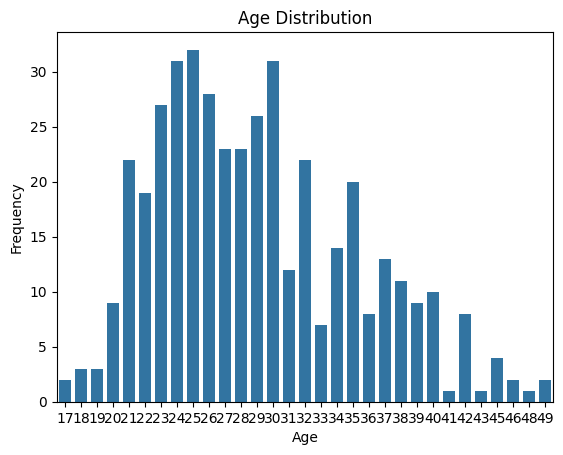

In [14]:
# prompt: determine sample distribution

import matplotlib.pyplot as plt
# Calculate the frequency of each value in the 'Age' column
age_counts = df['11a. Age of the respondent'].value_counts()

# Print the frequency table
print(age_counts)

# Plot a bar chart of the age distribution
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [15]:
# prompt: rank responses to question 83 a) What types of food do you buy from the supermarket? [Tick all that apply]/1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes)

# Count the number of responses for each food type
food_counts = df['83 a) What types of food do you buy from the supermarket? [Tick all that apply]'].value_counts()

# Sort the food types by the number of responses in descending order
ranked_foods = food_counts.sort_values(ascending=False)

# Print the ranked food types
print(ranked_foods)


83 a) What types of food do you buy from the supermarket? [Tick all that apply]
66=Other (specify)                                                                                                               231
1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes) 5=Sugar/ salt/cooking oil                                  38
5=Sugar/ salt/cooking oil  1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes)                                 31
5=Sugar/ salt/cooking oil                                                                                                         29
5=Sugar/ salt/cooking oil  3= Milk                                                                                                28
3= Milk  5=Sugar/ salt/cooking oil                                                                                                19
1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes) 3= Milk  5=Sugar/ salt/cooking oil                 

In [16]:
# prompt: replace numbers in 83 a) What types of food do you buy from the supermarket? [Tick all that apply]/1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes) with the first digit in corresponding responses in column 83 a) What types of food do you buy from the supermarket? [Tick all that apply]

# Create a mapping dictionary to replace the numbers with the corresponding food types
food_mapping = {
    1: 'Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes)',
    2: 'Fresh vegetables',
    3: 'Fresh fruits',
    4: 'Meat',
    5: 'Eggs',
    6: 'Milk and dairy products',
    7: 'Sugar',
    8: 'Cooking oil',
    9: 'Spices',
    10: 'Other (please specify)'
}

# Replace the numbers in the '883 a) What types of food do you buy from the supermarket? [Tick all that apply]' column with the corresponding food types
df['83 a) What types of food do you buy from the supermarket? [Tick all that apply]'] = df['83 a) What types of food do you buy from the supermarket? [Tick all that apply]'].replace(food_mapping)


In [17]:
# prompt: rank responses to new 83 a) What types of food do you buy from the supermarket? [Tick all that apply]/1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes) using previously made mapping dictionary titled food_mapping

# Count the number of responses for each food type in the new column
new_food_counts = df['83 a) What types of food do you buy from the supermarket? [Tick all that apply]'].value_counts()

# Sort the food types by the number of responses in descending order
ranked_new_foods = new_food_counts.sort_values(ascending=False)

# Print the ranked food types
print(ranked_new_foods)


83 a) What types of food do you buy from the supermarket? [Tick all that apply]
66=Other (specify)                                                                                                               231
1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes) 5=Sugar/ salt/cooking oil                                  38
5=Sugar/ salt/cooking oil  1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes)                                 31
5=Sugar/ salt/cooking oil                                                                                                         29
5=Sugar/ salt/cooking oil  3= Milk                                                                                                28
3= Milk  5=Sugar/ salt/cooking oil                                                                                                19
1= Dry foods (Maize, wheat, and porridge flour/ rice/ cereals/legumes) 3= Milk  5=Sugar/ salt/cooking oil                 

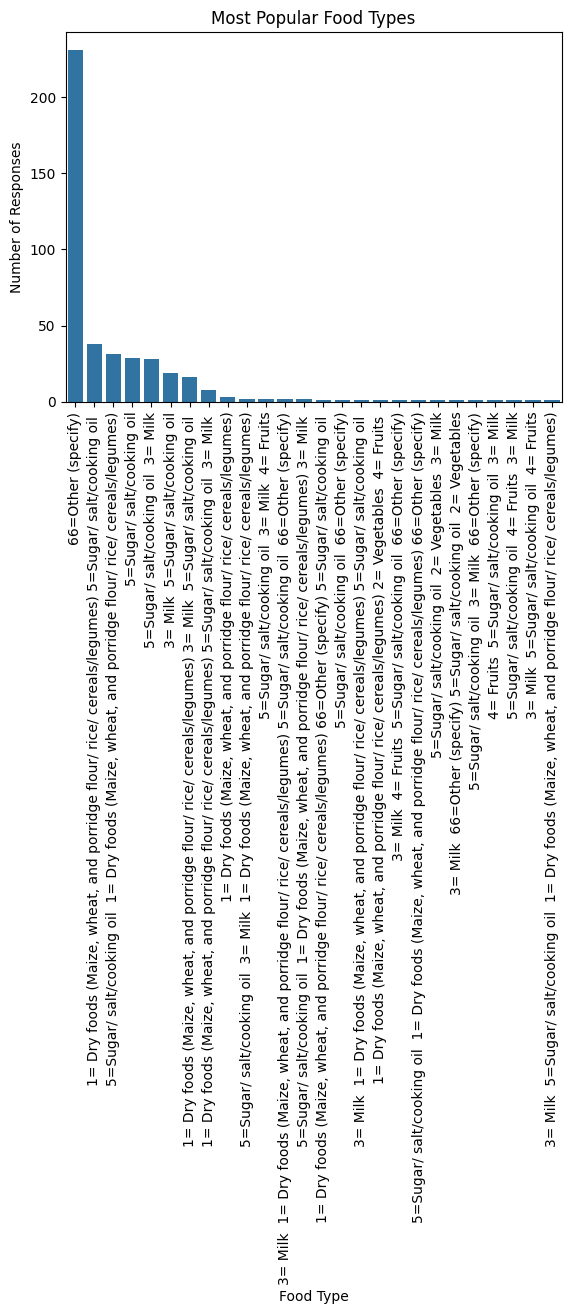

In [18]:
# prompt: make a graph of the responses above

import matplotlib.pyplot as plt
# Create a bar chart of the ranked food types
sns.barplot(x=ranked_new_foods.index, y=ranked_new_foods.values)

# Set the title and labels of the chart
plt.title('Most Popular Food Types')
plt.xlabel('Food Type')
plt.ylabel('Number of Responses')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()


In [19]:
# prompt: rank responses to 83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]

# Count the number of responses for each food type
food_counts = df['83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]'].value_counts()

# Sort the food types by the number of responses in descending order
ranked_foods = food_counts.sort_values(ascending=False)

# Print the ranked food types
print(ranked_foods)


83 b) What types of food do you buy from the Market (open and closed)? [Tick all that apply]
1= Starchy staple foods 2= Beans, peas/ lentils 7 = Leafy green vegetables                                                   66
7 = Leafy green vegetables 66=Other vegetables (specify)                                                                     35
7 = Leafy green vegetables                                                                                                   32
1= Starchy staple foods 7 = Leafy green vegetables                                                                           25
1= Starchy staple foods 2= Beans, peas/ lentils 7 = Leafy green vegetables 66=Other vegetables (specify)                     16
                                                                                                                             ..
2= Beans, peas/ lentils 3. Nuts or seeds 5= Meat or fish                                                                      1
7 = Leafy g

In [20]:
# prompt: rank responses to 83 c) What types of food do you buy from Other areas? [Tick all that apply]

# Count the number of responses for each food type
food_counts = df['83 c) What types of food do you buy from Other areas? [Tick all that apply]'].value_counts()

# Sort the food types by the number of responses in descending order
ranked_foods = food_counts.sort_values(ascending=False)

# Print the ranked food types
print(ranked_foods)


83 c) What types of food do you buy from Other areas? [Tick all that apply]
66=Other vegetables (specify)                                                                                                             54
1= Starchy staple foods 2= Beans, peas/ lentils                                                                                           43
1= Starchy staple foods                                                                                                                   23
5= Meat or fish                                                                                                                           20
4= Dairy products                                                                                                                         17
                                                                                                                                          ..
1= Starchy staple foods 2= Beans, peas/ lentils 7 = Leafy green vegetables 5= 

In [36]:
# prompt: total scoring for responses the following: 97.  Cleaning of cooking utensils before and after use, 98. I wash food before cooking to remove the bodily sweat, 99. I wash food before cooking to remove possible faecal contaminants, 100. I wash food before cooking to clear foul smell, 101. I wash food before cooking to clear sticky substance on the surface, 102. It is important to wash hands before,

df_hygiene = pd.read_csv('/content/drive/MyDrive/Food_Hygiene_Survey.csv')


In [37]:
df_hygiene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 14 columns):
 #   Column                                                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                                                     --------------  ----- 
 0   97.  Cleaning of cooking utensils before and after use                                                                                                                                     424 non-null    object
 1   98. I wash food before cooking to remove the bodily sweat                                                                                                                                  424 non-null    object
 2   99. I wash food before cooking

In [38]:
df_hygiene.head()

,97. Cleaning of cooking utensils before and after use,98. I wash food before cooking to remove the bodily sweat,99. I wash food before cooking to remove possible faecal contaminants,100. I wash food before cooking to clear foul smell,101. I wash food before cooking to clear sticky substance on the surface,102. It is important to wash hands before handling food after visiting the toilet/latrine,103. It is important to wash hands before handling food after handling garbage,104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking,105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking,106. I do separate raw food from cooked foods,"107. When I prepare fresh fruits and vegetables for myself, I thoroughly rinse the fruits and vegetables under running tap water, including those with skins and rinds that are not eaten",108. My child(ren) wash their hands with soap and running water right before eating a snack or meal,"109. After playing, my child(ren) wash their hands with soap and water before eating",110. The food for under 5yrs cooked differently from the rest of the family
0,3= Sometimes,1=Agree,1=Agree,1=Agree,1=Agree,2= Strongly Agree,2= Strongly Agree,4= Disagree,4= Disagree,1=Agree,1=Agree,1=Agree,2= Strongly Agree,3= Neither agree nor Disagree
1,4=Very Frequently,1=Agree,1=Agree,2= Strongly Agree,1=Agree,2= Strongly Agree,2= Strongly Agree,3= Neither agree nor Disagree,1=Agree,1=Agree,1=Agree,2= Strongly Agree,2= Strongly Agree,1=Agree
2,4=Very Frequently,5= Strongly disagree,5= Strongly disagree,5= Strongly disagree,5= Strongly disagree,2= Strongly Agree,2= Strongly Agree,2= Strongly Agree,2= Strongly Agree,2= Strongly Agree,4= Disagree,2= Strongly Agree,2= Strongly Agree,2= Strongly Agree
3,4=Very Frequently,2= Strongly Agree,1=Agree,1=Agree,1=Agree,1=Agree,1=Agree,1=Agree,1=Agree,2= Strongly Agree,3= Neither agree nor Disagree,2= Strongly Agree,1=Agree,2= Strongly Agree
4,4=Very Frequently,3= Neither agree nor Disagree,2= Strongly Agree,2= Strongly Agree,2= Strongly Agree,2= Strongly Agree,2= Strongly Agree,2= Strongly Agree,2= Strongly Agree,1=Agree,1=Agree,2= Strongly Agree,2= Strongly Agree,1=Agree


In [39]:
# prompt: develop a score for responses in df_hygiene from column 1 to column 13 where responses range from 1=Agree, 2= Strongly agree, 3= Neither agree or Disagree, 4= Disagree, 5= Strongly disagree, then run correlation between responses

# Create a mapping dictionary to convert the responses to numerical scores
response_mapping = {
    '1=Agree': 1,
    '2= Strongly Agree': 2,
    '3= Neither agree nor Disagree': 3,
    '4= Disagree': 4,
    '5= Strongly disagree': 5
}

# Apply the mapping to the columns from 1 to 13
df_hygiene[df_hygiene.columns[1:13]] = df_hygiene[df_hygiene.columns[1:13]].replace(response_mapping)

# Calculate the correlation matrix
corr_matrix = df_hygiene[df_hygiene.columns[1:13]].corr()

# Print the correlation matrix
print(corr_matrix)


                                                    98. I wash food before cooking to remove the bodily sweat  \
98. I wash food before cooking to remove the bo...                                           1.000000           
99. I wash food before cooking to remove possib...                                           0.396318           
100. I wash food before cooking to clear foul s...                                           0.391982           
101. I wash food before cooking to clear sticky...                                           0.563524           
102. It is important to wash hands before handl...                                           0.437225           
103. It is important to wash hands before handl...                                           0.455692           
104. The presence of refuse disposal points aro...                                           0.287059           
105. The presence of wastewater around the food...                                           0.2

Age Distribution
21-25    137
26-30    115
31-35     71
36-40     44
16-20     39
41-45     15
46-50      3
Name: count, dtype: int64


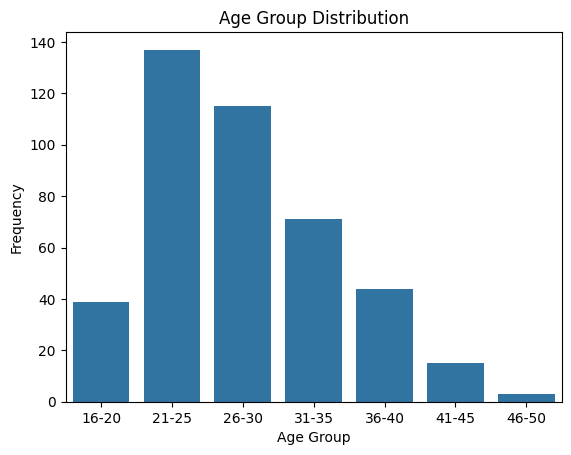

In [89]:
# prompt: Calculate Age distribution from ages found in 11a. Age of the respondent , Age distribution should be categorized as follows: 16-20
# 21-25
# 26-30
# 31-35
# 36-40
# 41-45
# 46-50

import pandas as pd
import matplotlib.pyplot as plt
# Create a new column for the age group
df['Age Distribution'] = pd.cut(df['11a. Age of the respondent'], bins=[16, 21, 26, 31, 36, 41, 46, 51], labels=['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50'])

# Calculate the frequency of each age group
age_group_counts = df['Age Distribution'].value_counts()

# Print the frequency table
print(age_group_counts)

# Plot a bar chart of the age group distribution
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()


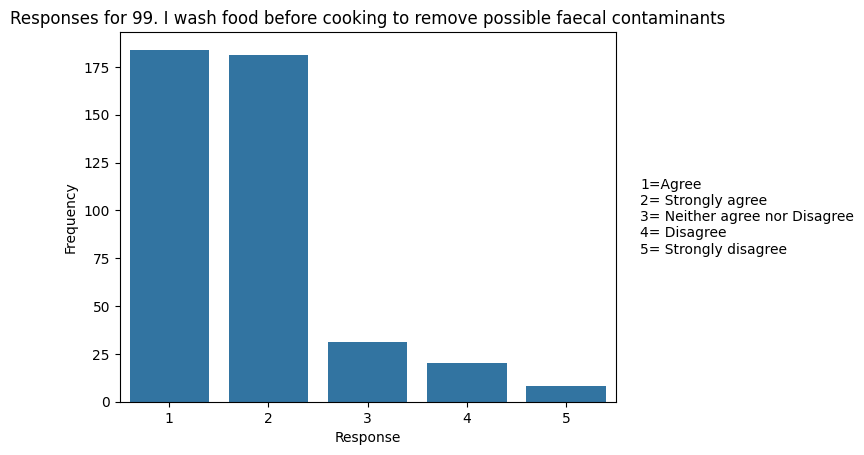

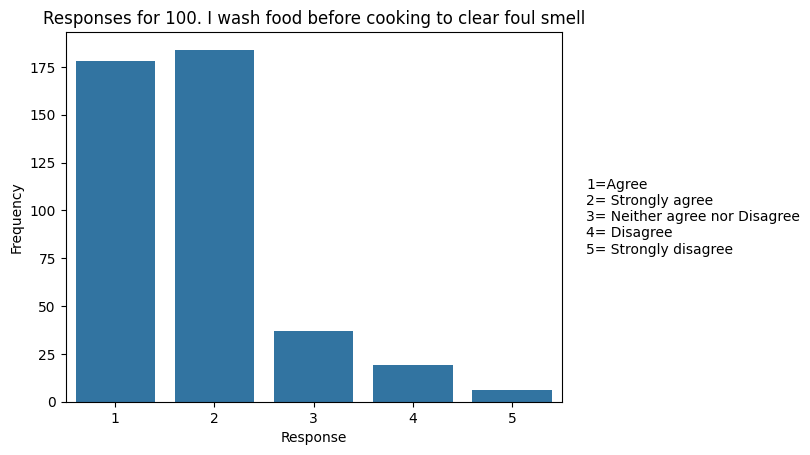

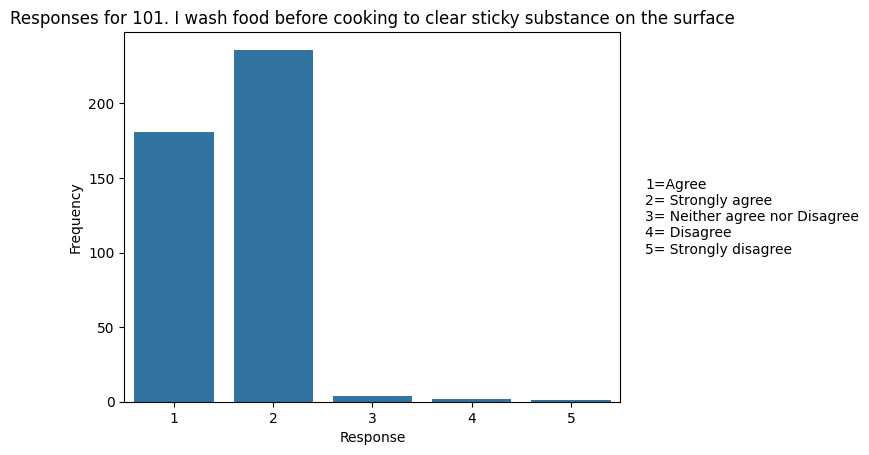

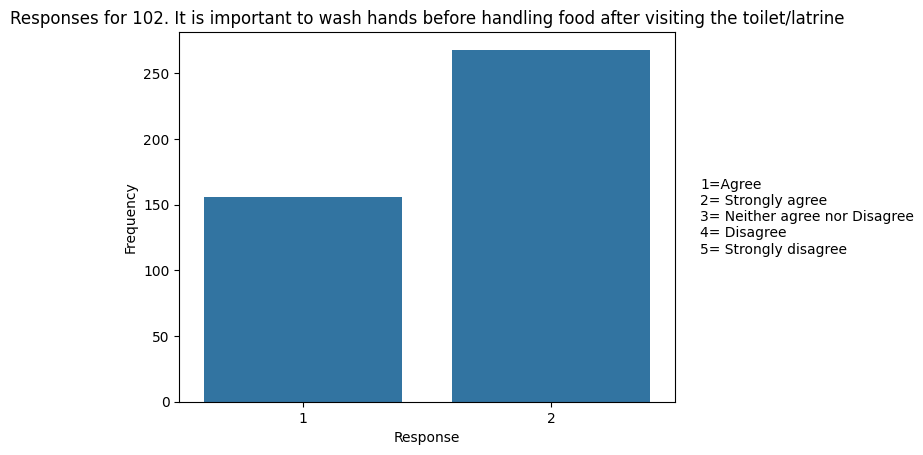

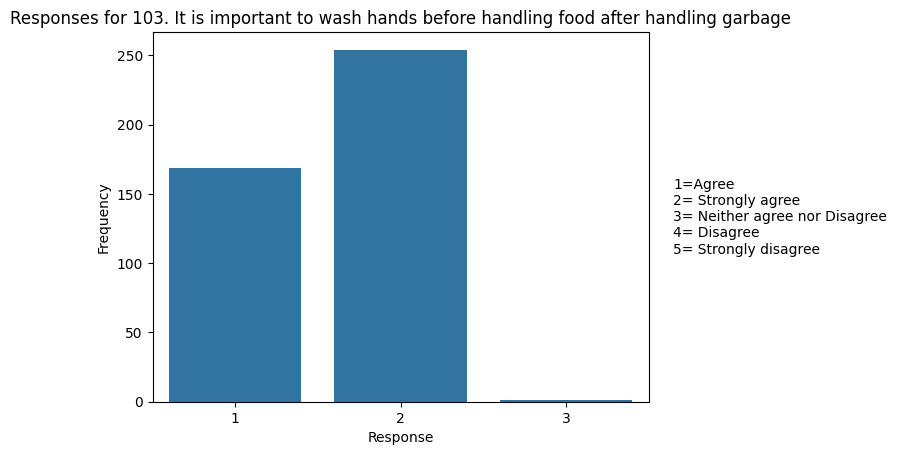

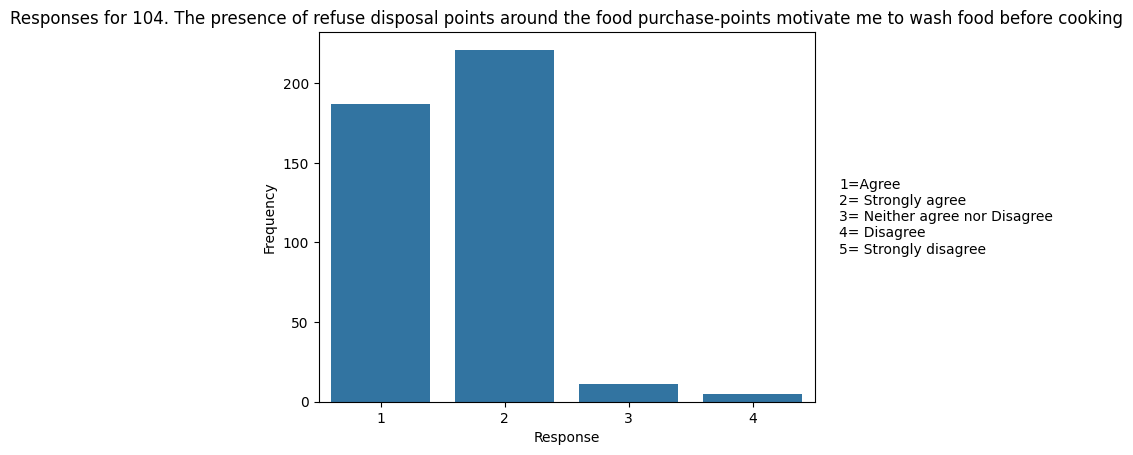

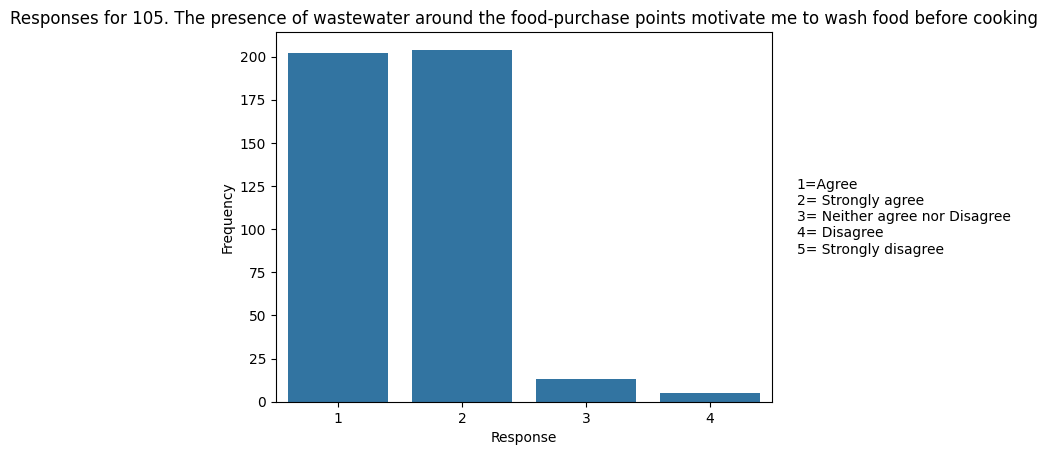

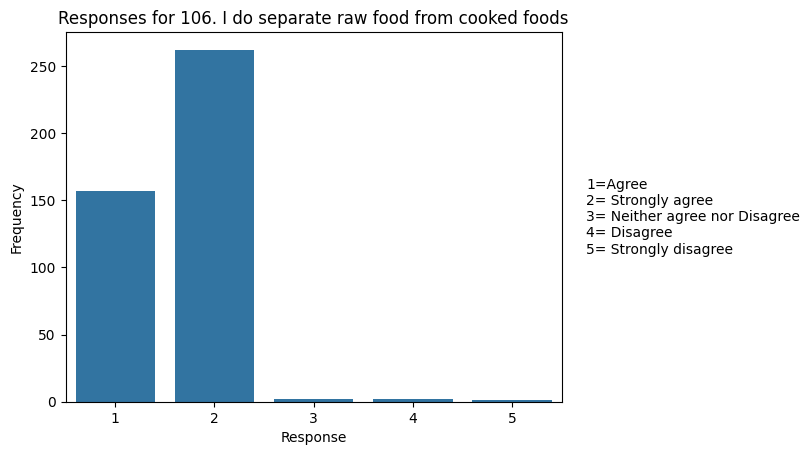

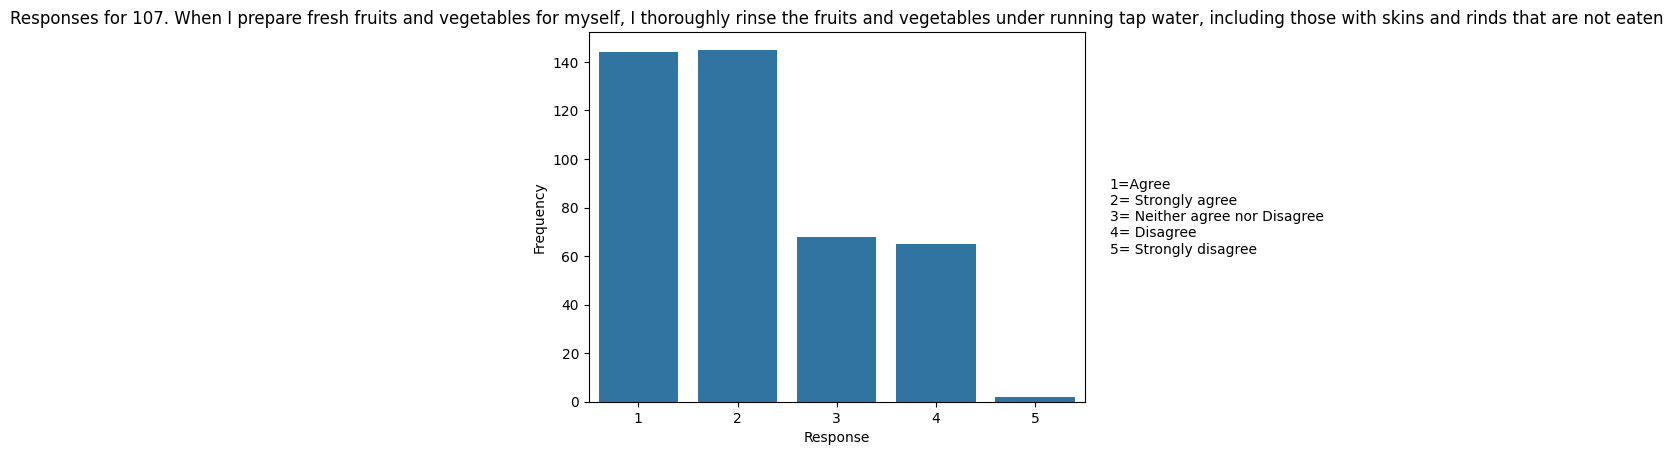

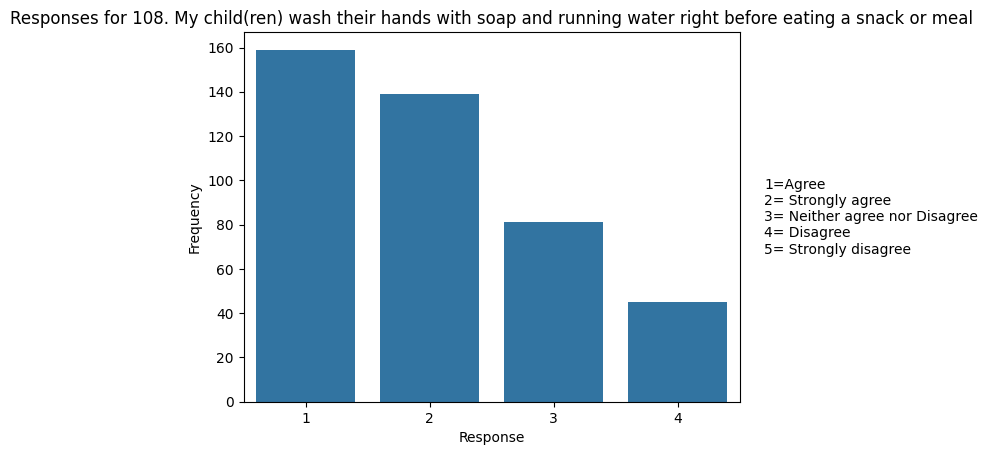

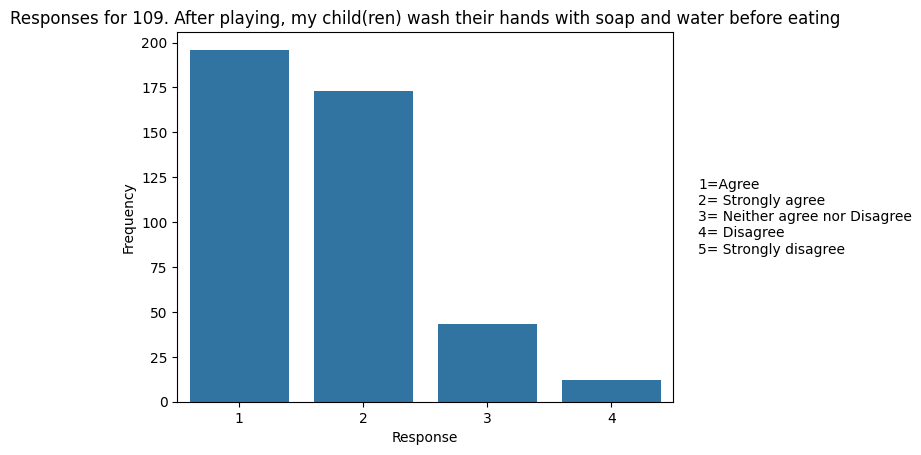

In [41]:
# prompt: based on the above response mapping plot responses for columns  2 through 13 in bar graphs and add a key to the right side of each plot stating that 1=Agree, 2= Strongly agree, 3= Neither agree or Disagree, 4= Disagree, 5= Strongly disagree

import matplotlib.pyplot as plt
# Create a list of column names
columns = df_hygiene.columns[2:13]

# Iterate over the columns
for column in columns:
    # Create a bar plot of the responses
    sns.countplot(x=column, data=df_hygiene)

    # Set the title and labels of the plot
    plt.title(f'Responses for {column}')
    plt.xlabel('Response')
    plt.ylabel('Frequency')

    # Add a key to the right side of the plot
    plt.text(1.05, 0.5, '1=Agree\n2= Strongly agree\n3= Neither agree nor Disagree\n4= Disagree\n5= Strongly disagree', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

    # Display the plot
    plt.show()


In [43]:
print(len(df_hygiene.columns[2:13]))

11


In [44]:
# prompt: run univariate regression on responses in df_hygiene  using response_mapping from columns 1 to 13

import statsmodels.api as sm
import pandas as pd

# Define the response variable
response_variable = df_hygiene.columns[1]

# Iterate over the predictor variables
for predictor in df_hygiene.columns[2:13]:
    # Create a new dataframe with the response and predictor variables
    df_temp = df_hygiene[[response_variable, predictor]]

    # Apply the response mapping to the response variable
    df_temp[response_variable] = df_temp[response_variable].replace(response_mapping)

    # Fit a univariate regression model
    model = sm.OLS(df_temp[response_variable], sm.add_constant(df_temp[predictor])).fit()

    # Print the model summary
    print(model.summary())


                                                OLS Regression Results                                               
Dep. Variable:     98. I wash food before cooking to remove the bodily sweat   R-squared:                       0.157
Model:                                                                   OLS   Adj. R-squared:                  0.155
Method:                                                        Least Squares   F-statistic:                     78.63
Date:                                                       Thu, 18 Apr 2024   Prob (F-statistic):           2.13e-17
Time:                                                               15:48:00   Log-Likelihood:                -430.45
No. Observations:                                                        424   AIC:                             864.9
Df Residuals:                                                            422   BIC:                             873.0
Df Model:                                               

In [45]:
print(df_hygiene.columns)

Index(['97.  Cleaning of cooking utensils before and after use',
       '98. I wash food before cooking to remove the bodily sweat',
       '99. I wash food before cooking to remove possible faecal contaminants',
       '100. I wash food before cooking to clear foul smell',
       '101. I wash food before cooking to clear sticky substance on the surface',
       '102. It is important to wash hands before handling food after visiting the toilet/latrine',
       '103. It is important to wash hands before handling food after handling garbage',
       '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking',
       '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking',
       '106. I do separate raw food from cooked foods',
       '107. When I prepare fresh fruits and vegetables for myself, I thoroughly rinse the fruits and vegetables under running tap water, including those wit

In [49]:
# prompt: run a multivariate regression on responses in df_hygiene  using response_mapping from columns 1 to 13, silence errors

import warnings
warnings.filterwarnings("ignore")

# Define the response variable
response_variable = df_hygiene.columns[1]

# Create a new dataframe with the response and predictor variables
df_temp = df_hygiene[df_hygiene.columns[1:13]]

# Apply the response mapping to the response variable
df_temp[response_variable] = df_temp[response_variable].replace(response_mapping)

# Fit a multivariate regression model
model = sm.OLS(df_temp[response_variable], sm.add_constant(df_temp.drop(response_variable, axis=1))).fit()

# Print the model summary
print(model.summary())


                                                OLS Regression Results                                               
Dep. Variable:     98. I wash food before cooking to remove the bodily sweat   R-squared:                       0.343
Model:                                                                   OLS   Adj. R-squared:                  0.325
Method:                                                        Least Squares   F-statistic:                     19.55
Date:                                                       Thu, 18 Apr 2024   Prob (F-statistic):           1.18e-31
Time:                                                               15:48:50   Log-Likelihood:                -377.64
No. Observations:                                                        424   AIC:                             779.3
Df Residuals:                                                            412   BIC:                             827.9
Df Model:                                               

In [50]:
# prompt: from df find the following column 93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?

df['93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?'].head()


0    1=Yes
1     0=No
2    1=Yes
3     0=No
4    1=Yes
Name: 93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?, dtype: object

In [51]:
# prompt: calculate number of responses that are yes or no in 93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)? from df

yes_no_counts = df['93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?'].value_counts()

print(yes_no_counts)


93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?
1=Yes    228
0=No     196
Name: count, dtype: int64


In [52]:
# prompt: calculate the number of responses that are yes or no in 40. Is water available in the house?

yes_no_counts = df['40. Is water available in the house?'].value_counts()
print(yes_no_counts)


40. Is water available in the house?
0=No      374
1=Yes,     50
Name: count, dtype: int64


In [53]:
# prompt: calculate number of responses 84. Place of food preparation in df

place_of_food_counts = df['84. Place of food preparation'].value_counts()
print(place_of_food_counts)


84. Place of food preparation
1=Indoors     420
2=Outdoors      4
Name: count, dtype: int64


In [54]:
# prompt: calculate number of responses to 91. Food storage/preservation in df  and calculate percentages of each  different response

storage_counts = df['91. Food storage/preservation'].value_counts()
storage_percentages = storage_counts * 100 / len(df)

print(storage_counts)
print(storage_percentages)


91. Food storage/preservation
2= Cool place      379
3= Never            29
1=Refrigeration     16
Name: count, dtype: int64
91. Food storage/preservation
2= Cool place      89.386792
3= Never            6.839623
1=Refrigeration     3.773585
Name: count, dtype: float64


In [55]:
# prompt: calculate number of responses to 14. Who manages the above income? in df and express each different response as a percentage

# Count the number of responses for each option in the '14. Who manages the above income?' column
income_counts = df['14. Who manages the above income?'].value_counts()

# Calculate the total number of responses
total_responses = len(df)

# Calculate the percentage of responses for each option
income_percentages = (income_counts / total_responses) * 100

# Print the results
print(income_counts)
print(income_percentages)


14. Who manages the above income?
2=Male HH             181
1=Female HH           161
66=Other (specify)     70
4=Mother               10
3=Father                2
Name: count, dtype: int64
14. Who manages the above income?
2=Male HH             42.688679
1=Female HH           37.971698
66=Other (specify)    16.509434
4=Mother               2.358491
3=Father               0.471698
Name: count, dtype: float64


In [56]:
# prompt: calculate responses to 16. Can you read? in df and express each different response as a percentage

# Count the number of responses for each option in the '16. Can you read?' column
reading_counts = df['16. Can you read?'].value_counts()

# Calculate the total number of responses
total_responses = len(df)

# Calculate the percentage of responses for each option
reading_percentages = (reading_counts / total_responses) * 100

# Print the results
print(reading_counts)
print(reading_percentages)


16. Can you read?
4= can both read and write      386
3= can either read or write      23
1= can neither read or write     13
2= can read                       2
Name: count, dtype: int64
16. Can you read?
4= can both read and write      91.037736
3= can either read or write      5.424528
1= can neither read or write     3.066038
2= can read                      0.471698
Name: count, dtype: float64


In [57]:
# prompt: calculate responses to 27. What is the total number of household members? in df and express different responses as a percentage

# Count the number of responses for each option in the '27. What is the total number of household members?' column
household_counts = df['27. What is the total number of household members?'].value_counts()

# Calculate the total number of responses
total_responses = len(df)

# Calculate the percentage of responses for each option
household_percentages = (household_counts / total_responses) * 100

# Print the results
print(household_counts)
print(household_percentages)


27. What is the total number of household members?
4     129
3     102
5      89
6      50
7      25
2      14
8      10
12      2
11      1
9       1
10      1
Name: count, dtype: int64
27. What is the total number of household members?
4     30.424528
3     24.056604
5     20.990566
6     11.792453
7      5.896226
2      3.301887
8      2.358491
12     0.471698
11     0.235849
9      0.235849
10     0.235849
Name: count, dtype: float64


In [58]:
# prompt: calculate responses to28. Number of children  in df and express different responses as a percentage dsiplay answer in descending order based response number

children_counts = df['28. Number of children'].value_counts()
total_responses = len(df)
children_percentages = (children_counts / total_responses) * 100
children_percentages = children_percentages.sort_values(ascending=False)
print(children_counts)
print(children_percentages)


28. Number of children
2     121
1     112
3     105
4      50
5      19
6      10
7       4
8       2
10      1
Name: count, dtype: int64
28. Number of children
2     28.537736
1     26.415094
3     24.764151
4     11.792453
5      4.481132
6      2.358491
7      0.943396
8      0.471698
10     0.235849
Name: count, dtype: float64


In [59]:
# prompt: calculate responses to 28 b. Number of children under 5 years and express different responses as a percentage

children_under_5_counts = df['28 b. Number of children under 5 years'].value_counts()
total_responses = len(df)
children_under_5_percentages = (children_under_5_counts / total_responses) * 100
children_under_5_percentages = children_under_5_percentages.sort_values(ascending=False)
print(children_under_5_counts)
print(children_under_5_percentages)


28 b. Number of children under 5 years
1    312
2     94
3     16
4      1
0      1
Name: count, dtype: int64
28 b. Number of children under 5 years
1    73.584906
2    22.169811
3     3.773585
4     0.235849
0     0.235849
Name: count, dtype: float64


In [60]:
# prompt: calculate responses to 28 c. Number of children over 5 years. (5 - 10 years)and express different responses as a percentage

children_5_10_counts = df['28 c. Number of children over 5 years. (5 - 10 years)'].value_counts()
total_responses = len(df)
children_5_10_percentages = (children_5_10_counts / total_responses) * 100
children_5_10_percentages = children_5_10_percentages.sort_values(ascending=False)
print(children_5_10_counts)
print(children_5_10_percentages)


28 c. Number of children over 5 years. (5 - 10 years)
0    207
1    167
2     41
3      7
4      2
Name: count, dtype: int64
28 c. Number of children over 5 years. (5 - 10 years)
0    48.820755
1    39.386792
2     9.669811
3     1.650943
4     0.471698
Name: count, dtype: float64


In [61]:
# prompt: calculate responses to 29. Number of teenagers (11-17 years) and express different responses as a percentage

children_11_17_counts = df['29. Number of teenagers (11-17 years)'].value_counts()
total_responses = len(df)
children_11_17_percentages = (children_11_17_counts / total_responses) * 100
children_11_17_percentages = children_11_17_percentages.sort_values(ascending=False)
print(children_11_17_counts)
print(children_11_17_percentages)


29. Number of teenagers (11-17 years)
0    277
1     94
2     40
3     11
4      1
5      1
Name: count, dtype: int64
29. Number of teenagers (11-17 years)
0    65.330189
1    22.169811
2     9.433962
3     2.594340
4     0.235849
5     0.235849
Name: count, dtype: float64


In [62]:
# prompt: calculate responses to 30. Number of adults (18 years and above) and express different responses as a percentage

adults_counts = df['30. Number of adults (18 years and above)'].value_counts()
total_responses = len(df)
adults_percentages = (adults_counts / total_responses) * 100
adults_percentages = adults_percentages.sort_values(ascending=False)
print(adults_counts)
print(adults_percentages)


30. Number of adults (18 years and above)
2    297
1     66
3     41
4      9
0      6
6      3
5      2
Name: count, dtype: int64
30. Number of adults (18 years and above)
2    70.047170
1    15.566038
3     9.669811
4     2.122642
0     1.415094
6     0.707547
5     0.471698
Name: count, dtype: float64


In [63]:
# prompt: find out if column 92. Do you check  expiry date of packaged foods? is in df

print('92. Do you check  expiry date of packaged foods?' in df.columns)


True


In [64]:
# prompt: calculate responses to 90. Reheat of previously cooked food, 92. Do you check  expiry date of packaged foods? , 97.  Cleaning of cooking utensils before and after use  range from 1=Never, 2=Rarely, 3= Sometimes, 4=Always

# Calculate the responses for each question
reheat_responses = df['90. Reheat of previously cooked food'].value_counts().sort_values(ascending=False)
expiry_responses = df['92. Do you check  expiry date of packaged foods?'].value_counts().sort_values(ascending=False)
education_responses = df['97.  Cleaning of cooking utensils before and after use'].value_counts().sort_values(ascending=False)

# Print the results
print("Responses for '90. Reheat of previously cooked food':")
print(reheat_responses)
print("\nResponses for '92. Do you check expiry date of packaged foods?':")
print(expiry_responses)
print("\nResponses for '93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?':")
print(education_responses)


Responses for '90. Reheat of previously cooked food':
90. Reheat of previously cooked food
4=Always        267
3= Sometimes    131
2=Rarely         22
1=Never           4
Name: count, dtype: int64

Responses for '92. Do you check expiry date of packaged foods?':
92. Do you check  expiry date of packaged foods?
4=Always        234
3= Sometimes    111
1=Never          41
2=Rarely         38
Name: count, dtype: int64

Responses for '93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?':
97.  Cleaning of cooking utensils before and after use
4=Very Frequently    368
3= Sometimes          56
Name: count, dtype: int64


In [65]:
# prompt: calculate the responses to 104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking, 105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking where 1=Agree, 2= Strongly agree, 3= Neither agree or Disagree, 4= Disagree, 5= Strongly disagree

# Calculate the responses for each question
refuse_responses = df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].value_counts().sort_values(ascending=False)
wastewater_responses = df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].value_counts().sort_values(ascending=False)

# Print the results
print("Responses for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking':")
print(refuse_responses)
print("\nResponses for '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking':")
print(wastewater_responses)


Responses for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking':
104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking
5    221
4    187
3     11
2      5
Name: count, dtype: int64

Responses for '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking':
105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking
5    204
4    202
3     13
2      5
Name: count, dtype: int64


In [66]:
# prompt: calculate responses to 57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?',
#                '92. Do you check  expiry date of packaged foods?',
#                '97.  Cleaning of cooking utensils before and after use',
#                '85. Frequency of cleaning cooking environment',
#                '89. Thorough boiling of food before consumption',

# Calculate the responses for each question
water_treatment_responses = df['57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?'].value_counts().sort_values(ascending=False)
expiry_date_responses = df['92. Do you check  expiry date of packaged foods?'].value_counts().sort_values(ascending=False)
cleaning_utensils_responses = df['97.  Cleaning of cooking utensils before and after use'].value_counts().sort_values(ascending=False)
cleaning_environment_responses = df['85. Frequency of cleaning cooking environment'].value_counts().sort_values(ascending=False)
boiling_food_responses = df['89. Thorough boiling of food before consumption'].value_counts().sort_values(ascending=False)

# Print the results
print("Responses for '57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?':")
print(water_treatment_responses)
print("\nResponses for '92. Do you check expiry date of packaged foods?':")
print(expiry_date_responses)
print("\nResponses for '97.  Cleaning of cooking utensils before and after use':")
print(cleaning_utensils_responses)
print("\nResponses for '85. Frequency of cleaning cooking environment':")
print(cleaning_environment_responses)
print("\nResponses for '89. Thorough boiling of food before consumption':")
print(boiling_food_responses)


Responses for '57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?':
57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?
1=Boiling                                  161
2=Purifying using water purifying agent     35
99=Don't_know/none                           4
4= Bought purified water                     2
Name: count, dtype: int64

Responses for '92. Do you check expiry date of packaged foods?':
92. Do you check  expiry date of packaged foods?
4=Always        234
3= Sometimes    111
1=Never          41
2=Rarely         38
Name: count, dtype: int64

Responses for '97.  Cleaning of cooking utensils before and after use':
97.  Cleaning of cooking utensils before and after use
4=Very Frequently    368
3= Sometimes          56
Name: count, dtype: int64

Responses for '85. Frequency of cleaning cooking environment':
85. Frequency of cleaning cooking environment
3= Often             309
4= when n

In [67]:
df[['57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?',
                      '92. Do you check  expiry date of packaged foods?',
                      '97.  Cleaning of cooking utensils before and after use',
                      '85. Frequency of cleaning cooking environment',
                      '89. Thorough boiling of food before consumption']].isnull().sum()

57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?    222
92. Do you check  expiry date of packaged foods?                                                         0
97.  Cleaning of cooking utensils before and after use                                                   0
85. Frequency of cleaning cooking environment                                                            0
89. Thorough boiling of food before consumption                                                          0
dtype: int64

In [81]:
# prompt: define knowledge as combined responses to '57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?','92. Do you check  expiry date of packaged foods?', '97.  Cleaning of cooking utensils before and after use', '85. Frequency of cleaning cooking environment', '89. Thorough boiling of food before consumption' use response map to convert str to int

response_map = {
    '1=Agree': 4,
    '2= Strongly Agree': 5,
    '3= Neither agree nor Disagree': 3,
    '4= Disagree': 2,
    '5= Strongly disagree': 1,
    '1=Boiling': 2,
    '2=Purifying using water purifying agent': 1,
    '4= Bought purified water': 3,
    '99=Dont_know/none': 0,
    "99=Don't_know/none": 0,
    'None': 0,
    '4=Always': 3,
    '3= Sometimes': 2,
    '2=Rarely': 1,
    '1=Never': 0,
    '4=Very Frequently': 3,
    '3= Sometimes': 2,
    '4= when necessary': 3,
    '3= Often': 2,
    '2=Rarely': 1,
}

df['Knowledge'] = df[['57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?',
                      '92. Do you check  expiry date of packaged foods?',
                      '97.  Cleaning of cooking utensils before and after use',
                      '85. Frequency of cleaning cooking environment',
                      '89. Thorough boiling of food before consumption']].fillna('3= Neither agree nor Disagree').applymap(lambda x: response_map[x]).mean(axis=1)

In [69]:
# prompt: calculate responses for the following : 98. I wash food before cooking to remove the bodily sweat,  99. I wash food before cooking to remove possible faecal contaminants,  100. I wash food before cooking to clear foul smell,  101. I wash food before cooking to clear sticky substance on the surface

sweat_responses = df['98. I wash food before cooking to remove the bodily sweat'].value_counts().sort_values(ascending=False)
faecal_responses = df['99. I wash food before cooking to remove possible faecal contaminants'].value_counts().sort_values(ascending=False)
smell_responses = df['100. I wash food before cooking to clear foul smell'].value_counts().sort_values(ascending=False)
sticky_responses = df['101. I wash food before cooking to clear sticky substance on the surface'].value_counts().sort_values(ascending=False)

# Print the results
print("Responses for '98. I wash food before cooking to remove the bodily sweat':")
print(sweat_responses)
print("\nResponses for '99. I wash food before cooking to remove possible faecal contaminants':")
print(faecal_responses)
print("\nResponses for '100. I wash food before cooking to clear foul smell':")
print(smell_responses)
print("\nResponses for '101. I wash food before cooking to clear sticky substance on the surface':")
print(sticky_responses)


Responses for '98. I wash food before cooking to remove the bodily sweat':
98. I wash food before cooking to remove the bodily sweat
1    217
2    160
3     41
4      5
5      1
Name: count, dtype: int64

Responses for '99. I wash food before cooking to remove possible faecal contaminants':
99. I wash food before cooking to remove possible faecal contaminants
1=Agree                          184
2= Strongly Agree                181
3= Neither agree nor Disagree     31
4= Disagree                       20
5= Strongly disagree               8
Name: count, dtype: int64

Responses for '100. I wash food before cooking to clear foul smell':
100. I wash food before cooking to clear foul smell
2= Strongly Agree                184
1=Agree                          178
3= Neither agree nor Disagree     37
4= Disagree                       19
5= Strongly disagree               6
Name: count, dtype: int64

Responses for '101. I wash food before cooking to clear sticky substance on the surface':
101

In [102]:
# prompt: combine responses to '98. I wash food before cooking to remove the bodily sweat', '99. I wash food before cooking to remove possible faecal contaminants', '100. I wash food before cooking to clear foul smell', '101. I wash food before cooking to clear sticky substance on the surface' as 'Practice' use response map to change responses to numerical

df['Practice'] = df[['98. I wash food before cooking to remove the bodily sweat', '99. I wash food before cooking to remove possible faecal contaminants', '100. I wash food before cooking to clear foul smell', '101. I wash food before cooking to clear sticky substance on the surface']].fillna('3= Neither agree nor Disagree').applymap(lambda x: response_map[x]).mean(axis=1)


In [82]:
# prompt: calculate responses for the following: 102. It is important to wash hands before handling food after visiting the toilet/latrine, 103. It is important to wash hands before handling food after handling garbage, 104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking, 105. The presence of wastewater around the food-purchase points motivate

toilet_responses = df['102. It is important to wash hands before handling food after visiting the toilet/latrine'].value_counts().sort_values(ascending=False)
garbage_responses = df['103. It is important to wash hands before handling food after handling garbage'].value_counts().sort_values(ascending=False)
refuse_responses = df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].value_counts().sort_values(ascending=False)
wastewater_responses = df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].value_counts().sort_values(ascending=False)

# Print the results
print("Responses for '102. It is important to wash hands before handling food after visiting the toilet/latrine':")
print(toilet_responses)
print("\nResponses for '103. It is important to wash hands before handling food after handling garbage':")
print(garbage_responses)
print("\nResponses for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking':")
print(refuse_responses)
print("\nResponses for '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking':")
print(wastewater_responses)




Responses for '102. It is important to wash hands before handling food after visiting the toilet/latrine':
102. It is important to wash hands before handling food after visiting the toilet/latrine
5    268
4    156
Name: count, dtype: int64

Responses for '103. It is important to wash hands before handling food after handling garbage':
103. It is important to wash hands before handling food after handling garbage
5    254
4    169
3      1
Name: count, dtype: int64

Responses for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking':
104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking
5    221
4    187
3     11
2      5
Name: count, dtype: int64

Responses for '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking':
105. The presence of wastewater around the food-purchase points motivate me to wash food before 

In [83]:
# prompt: find the mean, standard deviation and ANOVA p-value  of respondents who were either 1. Woman or 0. Man found in 10. Gender of respondent to water_treatment_responses

import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Extract the relevant data
data = df[df['10. Gender of respondent'].isin(['1. Woman', '0. Man'])]['57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?']

data = pd.to_numeric(data, errors='coerce')

# Calculate the mean and standard deviation for each group
woman_mean = data[df['10. Gender of respondent'] == '1. Woman'].mean()
man_mean = data[df['10. Gender of respondent'] == '0. Man'].mean()
woman_std = data[df['10. Gender of respondent'] == '1. Woman'].std()
man_std = data[df['10. Gender of respondent'] == '0. Man'].std()

# Perform ANOVA test
f_statistic, p_value = f_oneway(data[df['10. Gender of respondent'] == '1. Woman'], data[df['10. Gender of respondent'] == '0. Man'])

# Print the results
print("Mean (Woman):", woman_mean)
print("Mean (Man):", man_mean)
print("Standard deviation (Woman):", woman_std)
print("Standard deviation (Man):", man_std)
print("ANOVA p-value:", p_value)



Mean (Woman): nan
Mean (Man): nan
Standard deviation (Woman): nan
Standard deviation (Man): nan
ANOVA p-value: nan


In [84]:
# prompt: find the mean response to '57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?'
water_treatment = df['57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?']

water_treatment = pd.to_numeric(water_treatment, errors='coerce')

mean_response = water_treatment.mean()

print(f"Mean response: {mean_response}")


Mean response: nan


In [85]:
# prompt: develop a score for water_treatment responses and find the mean and standard deviation based on 10. Gender of respondent , skip missing values

import pandas as pd
from scipy.stats import f_oneway

# Create a dictionary to map the responses to scores
response_mapping = {
    'Boiling': 4,
    'Chlorination': 3,
    'Solar disinfection': 2,
    'Filtration': 1,
    'None': 0
}

# Apply the mapping to the water_treatment column
df['water_treatment_score'] = df['57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?'].map(response_mapping)
# Extract the relevant data
data = df[df['10. Gender of respondent'].isin(['1. Woman', '0. Man'])]['water_treatment_score'].dropna()

# Calculate the mean and standard deviation for each group
woman_mean = data[df['10. Gender of respondent'] == '1. Woman'].mean(skipna=True)
man_mean = data[df['10. Gender of respondent'] == '0. Man'].mean(skipna=True)
woman_std = data[df['10. Gender of respondent'] == '1. Woman'].std(skipna=True)
man_std = data[df['10. Gender of respondent'] == '0. Man'].std(skipna=True)

# Perform ANOVA test
f_statistic, p_value = f_oneway(data[df['10. Gender of respondent'] == '1. Woman'], data[df['10. Gender of respondent'] == '0. Man'])

# Print the results
print("Mean (Woman):", woman_mean)
print("Mean (Man):", man_mean)
print("Standard deviation (Woman):", woman_std)
print("Standard deviation (Man):", man_std)
print("ANOVA p-value:", p_value)


Mean (Woman): nan
Mean (Man): nan
Standard deviation (Woman): nan
Standard deviation (Man): nan
ANOVA p-value: nan


In [ ]:
print(water_treatment.dtypes)


In [ ]:
# prompt: mean of individuals who responded 1=Boiling to '57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?'

# Create a dictionary to map the responses to scores
response_mapping = {
    'Boiling': 4,
    'Chlorination': 3,
    'Solar disinfection': 2,
    'Filtration': 1,
    'None': 0
}

# Apply the mapping to the water_treatment column
df['water_treatment_score'] = df['57. Which methods for water treatment did you use for drinking water treatment in the last 2 weeks?'].map(response_mapping)

# Extract the data for individuals who responded 1=Boiling
boiling_data = df[df['water_treatment_score'] == 4]

# Calculate the mean
mean_boiling = boiling_data['water_treatment_score'].mean()

# Print the result
print(f"Mean for individuals who responded 1=Boiling: {mean_boiling}")


In [ ]:
# prompt: mean responses to 98. I wash food before cooking to remove the bodily sweat by 'Gender' use a response map

import pandas as pd

# Create a dictionary to map the responses
response_mapping = {
    '1=Agree': 1,
    '2= Strongly Agree': 2,
    '3= Neither agree nor Disagree': 3,
    '4= Disagree': 4,
    '5= Strongly disagree': 5
}

# Apply the mapping to the column
df['98. I wash food before cooking to remove the bodily sweat'] = df['98. I wash food before cooking to remove the bodily sweat'].replace(response_mapping)

# Extract the relevant data
data = df[df['10. Gender of respondent'].isin(['1. Woman', '0. Man'])]['98. I wash food before cooking to remove the bodily sweat']

# Calculate the mean for each group
woman_mean = data[df['10. Gender of respondent'] == '1. Woman'].mean()
man_mean = data[df['10. Gender of respondent'] == '0. Man'].mean()
woman_std = data[df['10. Gender of respondent'] == '1. Woman'].std
man_std = data[df['10. Gender of respondent'] == '0. Man'].std

# Perform ANOVA test
f_statistic, p_value = f_oneway(data[df['10. Gender of respondent'] == '1. Woman'], data[df['10. Gender of respondent'] == '0. Man'])


# Print the results
print(f"Mean response for women: {woman_mean}")
print(f"Mean response for men: {man_mean}")
print("Standard deviation (Woman):", woman_std)
print("Standard deviation (Man):", man_std)
print("ANOVA p-value:", p_value)



In [86]:
# prompt: mean responses to 102. It is important to wash hands before handling food after visiting the toilet/latrine, 103. It is important to wash hands before handling food after handling garbage, 104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking, 105. The presence of wastewater around the food-purchase points motivate by 'Gender' use respo

import pandas as pd

# Create a dictionary to map the responses
response_mapping = {
    '1=Agree': 4,
    '2= Strongly Agree': 5,
    '3= Neither agree nor Disagree': 3,
    '4= Disagree': 2,
    '5= Strongly disagree': 1
}

# Apply the mapping to the relevant columns
df['102. It is important to wash hands before handling food after visiting the toilet/latrine'] = df['102. It is important to wash hands before handling food after visiting the toilet/latrine'].replace(response_mapping)
df['103. It is important to wash hands before handling food after handling garbage'] = df['103. It is important to wash hands before handling food after handling garbage'].replace(response_mapping)
df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'] = df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].replace(response_mapping)
df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'] = df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].replace(response_mapping)

# Extract the data for each question
toilet_data = df['102. It is important to wash hands before handling food after visiting the toilet/latrine']
garbage_data = df['103. It is important to wash hands before handling food after handling garbage']
refuse_data = df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking']
wastewater_data = df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking']

# Calculate the mean response for each question, grouped by 'Gender'
toilet_mean = toilet_data.groupby(df['10. Gender of respondent']).mean()
garbage_mean = garbage_data.groupby(df['10. Gender of respondent']).mean()
refuse_mean = refuse_data.groupby(df['10. Gender of respondent']).mean()
wastewater_mean = wastewater_data.groupby(df['10. Gender of respondent']).mean()

# Print the results
print("Mean response for '102. It is important to wash hands before handling food after visiting the toilet/latrine':")
print(toilet_mean)
print("\nMean response for '103. It is important to wash hands before handling food after handling garbage':")
print(garbage_mean)
print("\nMean response for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking':")
print(refuse_mean)
print("\nMean response for '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking':")
print(wastewater_mean)


Mean response for '102. It is important to wash hands before handling food after visiting the toilet/latrine':
10. Gender of respondent
0. Man      4.500000
1. Woman    4.632701
Name: 102. It is important to wash hands before handling food after visiting the toilet/latrine, dtype: float64

Mean response for '103. It is important to wash hands before handling food after handling garbage':
10. Gender of respondent
0. Man      4.500000
1. Woman    4.597156
Name: 103. It is important to wash hands before handling food after handling garbage, dtype: float64

Mean response for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking':
10. Gender of respondent
0. Man      4.500000
1. Woman    4.471564
Name: 104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking, dtype: float64

Mean response for '105. The presence of wastewater around the food-purchase points motivate me to

In [87]:
# prompt: combined mean, standard deviation and ANOVA p-value responses to 102. It is important to wash hands before handling food after visiting the toilet/latrine, 103. It is important to wash hands before handling food after handling garbage, 104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking, 105. The presence of wastewater around the

# Extract the relevant data
toilet_data = df[df['10. Gender of respondent'].isin(['1. Woman', '0. Man'])]['102. It is important to wash hands before handling food after visiting the toilet/latrine']
garbage_data = df[df['10. Gender of respondent'].isin(['1. Woman', '0. Man'])]['103. It is important to wash hands before handling food after handling garbage']
refuse_data = df[df['10. Gender of respondent'].isin(['1. Woman', '0. Man'])]['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking']
wastewater_data = df[df['10. Gender of respondent'].isin(['1. Woman', '0. Man'])]['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking']

# Calculate the mean and standard deviation for each group
toilet_mean = toilet_data.groupby(df['10. Gender of respondent']).agg(['mean', 'std'])
garbage_mean = garbage_data.groupby(df['10. Gender of respondent']).agg(['mean', 'std'])
refuse_mean = refuse_data.groupby(df['10. Gender of respondent']).agg(['mean', 'std'])
wastewater_mean = wastewater_data.groupby(df['10. Gender of respondent']).agg(['mean', 'std'])

# Perform ANOVA test
toilet_f_statistic, toilet_p_value = f_oneway(toilet_data[df['10. Gender of respondent'] == '1. Woman'], toilet_data[df['10. Gender of respondent'] == '0. Man'])
garbage_f_statistic, garbage_p_value = f_oneway(garbage_data[df['10. Gender of respondent'] == '1. Woman'], garbage_data[df['10. Gender of respondent'] == '0. Man'])
refuse_f_statistic, refuse_p_value = f_oneway(refuse_data[df['10. Gender of respondent'] == '1. Woman'], refuse_data[df['10. Gender of respondent'] == '0. Man'])
wastewater_f_statistic, wastewater_p_value = f_oneway(wastewater_data[df['10. Gender of respondent'] == '1. Woman'], wastewater_data[df['10. Gender of respondent'] == '0. Man'])

# Print the results
print("Combined results:")
print("Question: 102. It is important to wash hands before handling food after visiting the toilet/latrine")
print(toilet_mean)
print("ANOVA p-value:", toilet_p_value)
print("\nQuestion: 103. It is important to wash hands before handling food after handling garbage")
print(garbage_mean)
print("ANOVA p-value:", garbage_p_value)
print("\nQuestion: 104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking")
print(refuse_mean)
print("ANOVA p-value:", refuse_p_value)
print("\nQuestion: 105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking")
print(wastewater_mean)
print("ANOVA p-value:", wastewater_p_value)


Combined results:
Question: 102. It is important to wash hands before handling food after visiting the toilet/latrine
                              mean       std
10. Gender of respondent                    
0. Man                    4.500000  0.707107
1. Woman                  4.632701  0.482641
ANOVA p-value: 0.6986614019036832

Question: 103. It is important to wash hands before handling food after handling garbage
                              mean       std
10. Gender of respondent                    
0. Man                    4.500000  0.707107
1. Woman                  4.597156  0.495866
ANOVA p-value: 0.782607290416745

Question: 104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking
                              mean       std
10. Gender of respondent                    
0. Man                    4.500000  0.707107
1. Woman                  4.471564  0.610982
ANOVA p-value: 0.94769724869249

Question: 105. The presen

In [91]:
# prompt: mean responses to 102. It is important to wash hands before handling food after visiting the toilet/latrine, 103. It is important to wash hands before handling food after handling garbage, 104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking, 105. The presence of wastewater around the food-purch by 'Age Distribution' use a response map

# Create a dictionary to map the responses
response_mapping = {
    '1=Agree': 4,
    '2= Strongly Agree': 5,
    '3= Neither agree nor Disagree': 3,
    '4= Disagree': 2,
    '5= Strongly disagree': 1
}

# Apply the mapping to the relevant columns
df['102. It is important to wash hands before handling food after visiting the toilet/latrine'] = df['102. It is important to wash hands before handling food after visiting the toilet/latrine'].replace(response_mapping)
df['103. It is important to wash hands before handling food after handling garbage'] = df['103. It is important to wash hands before handling food after handling garbage'].replace(response_mapping)
df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'] = df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].replace(response_mapping)
df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'] = df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].replace(response_mapping)

# Extract the data for each question, grouped by 'Age Distribution'
toilet_data = df.groupby('Age Distribution')['102. It is important to wash hands before handling food after visiting the toilet/latrine'].mean()
garbage_data = df.groupby('Age Distribution')['103. It is important to wash hands before handling food after handling garbage'].mean()
refuse_data = df.groupby('Age Distribution')['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].mean()
wastewater_data = df.groupby('Age Distribution')['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].mean()

# Print the results
print("Mean responses to '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by 'Age Distribution':")
print(toilet_data)
print("\nMean responses to '103. It is important to wash hands before handling food after handling garbage', grouped by 'Age Distribution':")
print(garbage_data)
print("\nMean responses to '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking', grouped by 'Age Distribution':")
print(refuse_data)
print("\nMean responses to '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking', grouped by 'Age Distribution':")
print(wastewater_data)


Mean responses to '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by 'Age Distribution':
Age Distribution
16-20    4.615385
21-25    4.627737
26-30    4.678261
31-35    4.647887
36-40    4.500000
41-45    4.733333
46-50    4.333333
Name: 102. It is important to wash hands before handling food after visiting the toilet/latrine, dtype: float64

Mean responses to '103. It is important to wash hands before handling food after handling garbage', grouped by 'Age Distribution':
Age Distribution
16-20    4.538462
21-25    4.627737
26-30    4.608696
31-35    4.577465
36-40    4.545455
41-45    4.733333
46-50    4.000000
Name: 103. It is important to wash hands before handling food after handling garbage, dtype: float64

Mean responses to '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking', grouped by 'Age Distribution':
Age Distribution
16-20    4.512821
21-25    4.416058
26-30

In [92]:
# prompt: find standard deviation and ANOVA p-value of responses from the following based on 'Age Distribution': 102. It is important to wash hands before handling food after visiting the toilet/latrine, 103. It is important to wash hands before handling food after handling garbage, 104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking, 105. The
from scipy.stats import f_oneway
# Extract the data for each question, grouped by 'Age Distribution'
toilet_data = df.groupby('Age Distribution')['102. It is important to wash hands before handling food after visiting the toilet/latrine']
garbage_data = df.groupby('Age Distribution')['103. It is important to wash hands before handling food after handling garbage']
refuse_data = df.groupby('Age Distribution')['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking']
wastewater_data = df.groupby('Age Distribution')['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking']

# Calculate the standard deviation and ANOVA p-value for each question
toilet_std = toilet_data.agg(['std', 'var'])
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data])
garbage_std = garbage_data.agg(['std', 'var'])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data])
refuse_std = refuse_data.agg(['std', 'var'])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data])
wastewater_std = wastewater_data.agg(['std', 'var'])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data])

# Print the results
print("Standard deviation and ANOVA p-values for '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by 'Age Distribution':")
print(toilet_std)
print("ANOVA p-value:", toilet_p_value)
print("\nStandard deviation and ANOVA p-values for '103. It is important to wash hands before handling food after handling garbage', grouped by 'Age Distribution':")
print(garbage_std)
print("ANOVA p-value:", garbage_p_value)
print("\nStandard deviation and ANOVA p-values for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking', grouped by 'Age Distribution':")
print(refuse_std)
print("ANOVA p-value:", refuse_p_value)
print("\nStandard deviation and ANOVA p-values for '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking', grouped by 'Age Distribution':")
print(wastewater_std)
print("ANOVA p-value:", wastewater_p_value)


Standard deviation and ANOVA p-values for '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by 'Age Distribution':
                       std       var
Age Distribution                    
16-20             0.492864  0.242915
21-25             0.485182  0.235401
26-30             0.469188  0.220137
31-35             0.481028  0.231388
36-40             0.505781  0.255814
41-45             0.457738  0.209524
46-50             0.577350  0.333333
ANOVA p-value: 0.3931690062883445

Standard deviation and ANOVA p-values for '103. It is important to wash hands before handling food after handling garbage', grouped by 'Age Distribution':
                       std       var
Age Distribution                    
16-20             0.505035  0.255061
21-25             0.485182  0.235401
26-30             0.490178  0.240275
31-35             0.525411  0.276056
36-40             0.503686  0.253700
41-45             0.457738  0.209524
46-50          

In [93]:
# prompt: find mean, standard deviation and ANOVA p-value of responses from the following based on 20. Marital status: 102. It is important to wash hands before handling food after visiting the toilet/latrine, 103. It is important to wash hands before handling food after handling garbage, 104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking, 105. The

# Create a dictionary to map the responses
response_mapping = {
    '1=Agree': 4,
    '2= Strongly Agree': 5,
    '3= Neither agree nor Disagree': 3,
    '4= Disagree': 2,
    '5= Strongly disagree': 1
}

# Apply the mapping to the relevant columns
df['102. It is important to wash hands before handling food after visiting the toilet/latrine'] = df['102. It is important to wash hands before handling food after visiting the toilet/latrine'].replace(response_mapping)
df['103. It is important to wash hands before handling food after handling garbage'] = df['103. It is important to wash hands before handling food after handling garbage'].replace(response_mapping)
df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'] = df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].replace(response_mapping)
df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'] = df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].replace(response_mapping)

# Extract the data for each question, grouped by 'Marital status'
toilet_data = df.groupby('20. Marital status of the respondent')['102. It is important to wash hands before handling food after visiting the toilet/latrine'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('20. Marital status of the respondent')['103. It is important to wash hands before handling food after handling garbage'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('20. Marital status of the respondent')['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('20. Marital status of the respondent')['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-values for '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by 'Marital status':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '103. It is important to wash hands before handling food after handling garbage', grouped by 'Marital status':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking', grouped by 'Marital status':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking', grouped by 'Marital status':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)


Mean, standard deviation, and ANOVA p-values for '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by 'Marital status':
                                          mean       std       var
20. Marital status of the respondent                              
1. Single                             4.635294  0.484204  0.234454
2. Monogamously married               4.635379  0.482195  0.232512
3. Polygamous married 1st wife        4.714286  0.487950  0.238095
4. Polygamous married 2nd             4.333333  0.577350  0.333333
5. Separated/Divorced                 4.590909  0.497350  0.247357
6. Widowed                            4.714286  0.487950  0.238095
99. Other (Specify)                   5.000000       NaN       NaN
ANOVA p-value: nan

Mean, standard deviation, and ANOVA p-values for '103. It is important to wash hands before handling food after handling garbage', grouped by 'Marital status':
                                          mean

In [94]:
# prompt: find mean, standard deviation and ANOVA p=value for the following based 24. Religion of the households : 102. It is important to wash hands before handling food after visiting the toilet/latrine, 103. It is important to wash hands before handling food after handling garbage, 104. The p

# Create a dictionary to map the responses
response_mapping = {
    '1=Agree': 4,
    '2= Strongly Agree': 5,
    '3= Neither agree nor Disagree': 3,
    '4= Disagree': 2,
    '5= Strongly disagree': 1
}

# Apply the mapping to the relevant columns
df['102. It is important to wash hands before handling food after visiting the toilet/latrine'] = df['102. It is important to wash hands before handling food after visiting the toilet/latrine'].replace(response_mapping)
df['103. It is important to wash hands before handling food after handling garbage'] = df['103. It is important to wash hands before handling food after handling garbage'].replace(response_mapping)
df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'] = df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].replace(response_mapping)
df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'] = df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].replace(response_mapping)

# Extract the data for each question, grouped by '24. Religion of the households'
toilet_data = df.groupby('24. Religion of the household')['102. It is important to wash hands before handling food after visiting the toilet/latrine'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('24. Religion of the household')['103. It is important to wash hands before handling food after handling garbage'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('24. Religion of the household')['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('24. Religion of the household')['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-values for '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by '24. Religion of the households':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '103. It is important to wash hands before handling food after handling garbage', grouped by '24. Religion of the households':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking', grouped by '24. Religion of the households':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking', grouped by '24. Religion of the households':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)


Mean, standard deviation, and ANOVA p-values for '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by '24. Religion of the households':
                                   mean       std       var
24. Religion of the household                              
1. Christian                   4.622159  0.485538  0.235747
2. Muslim                      4.690141  0.465727  0.216901
99._Don't_know/_none           4.000000       NaN       NaN
ANOVA p-value: nan

Mean, standard deviation, and ANOVA p-values for '103. It is important to wash hands before handling food after handling garbage', grouped by '24. Religion of the households':
                                   mean       std       var
24. Religion of the household                              
1. Christian                   4.590909  0.498119  0.248122
2. Muslim                      4.633803  0.485193  0.235412
99._Don't_know/_none           4.000000       NaN       NaN
ANOVA p-value: na

In [95]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 12. Occupation? : 102. It is important to wash hands before handling food after visiting the toilet/latrine, 103. It is important to wash hands before handling food after handling garbage, 104. The p

# Create a dictionary to map the responses
response_mapping = {
    '1=Agree': 4,
    '2= Strongly Agree': 5,
    '3= Neither agree nor Disagree': 3,
    '4= Disagree': 2,
    '5= Strongly disagree': 1
}

# Apply the mapping to the relevant columns
df['102. It is important to wash hands before handling food after visiting the toilet/latrine'] = df['102. It is important to wash hands before handling food after visiting the toilet/latrine'].replace(response_mapping)
df['103. It is important to wash hands before handling food after handling garbage'] = df['103. It is important to wash hands before handling food after handling garbage'].replace(response_mapping)
df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'] = df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].replace(response_mapping)
df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'] = df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].replace(response_mapping)

# Extract the data for each question, grouped by '12. Occupation'
toilet_data = df.groupby('12. Occupation?')['102. It is important to wash hands before handling food after visiting the toilet/latrine'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('12. Occupation?')['103. It is important to wash hands before handling food after handling garbage'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('12. Occupation?')['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('12. Occupation?')['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-values for '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by '12. Occupation':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '103. It is important to wash hands before handling food after handling garbage', grouped by '12. Occupation':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking', grouped by '12. Occupation':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking', grouped by '12. Occupation':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)


Mean, standard deviation, and ANOVA p-values for '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by '12. Occupation':
                                mean       std       var
12. Occupation?                                         
1=Casual / Daily labourer   4.632075  0.484532  0.234771
2=Employed (specify)        4.714286  0.462910  0.214286
3=Small business (specify)  4.628571  0.486675  0.236853
4=Government service        5.000000       NaN       NaN
5=Other independent work    4.266667  0.457738  0.209524
66=Other (specify)          4.820000  0.388088  0.150612
99=Don't_know/_none         4.591195  0.493166  0.243213
Other                       5.000000  0.000000  0.000000
ANOVA p-value: nan

Mean, standard deviation, and ANOVA p-values for '103. It is important to wash hands before handling food after handling garbage', grouped by '12. Occupation':
                                mean       std       var
12. Occupation?       

In [74]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 13. What is the Estimated total monthly income of your household (Kshs)? : 102. It is important to wash hands before handling food after visiting the toilet/latrine, 103. It is important to wash hands before handling food after handling garbage, 104. The p

# Create a dictionary to map the responses
response_mapping = {
    '1=Agree': 4,
    '2= Strongly Agree': 5,
    '3= Neither agree nor Disagree': 3,
    '4= Disagree': 2,
    '5= Strongly disagree': 1
}

# Apply the mapping to the relevant columns
df['102. It is important to wash hands before handling food after visiting the toilet/latrine'] = df['102. It is important to wash hands before handling food after visiting the toilet/latrine'].replace(response_mapping)
df['103. It is important to wash hands before handling food after handling garbage'] = df['103. It is important to wash hands before handling food after handling garbage'].replace(response_mapping)
df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'] = df['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].replace(response_mapping)
df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'] = df['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].replace(response_mapping)

# Extract the data for each question, grouped by '13. What is the Estimated total monthly income of your household (Kshs)?'
toilet_data = df.groupby('13. What is the Estimated total monthly income of your household (Kshs)?')['102. It is important to wash hands before handling food after visiting the toilet/latrine'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('13. What is the Estimated total monthly income of your household (Kshs)?')['103. It is important to wash hands before handling food after handling garbage'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('13. What is the Estimated total monthly income of your household (Kshs)?')['104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('13. What is the Estimated total monthly income of your household (Kshs)?')['105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-values for '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '103. It is important to wash hands before handling food after handling garbage', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '104. The presence of refuse disposal points around the food purchase-points motivate me to wash food before cooking', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-values for '105. The presence of wastewater around the food-purchase points motivate me to wash food before cooking', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)


Mean, standard deviation, and ANOVA p-values for '102. It is important to wash hands before handling food after visiting the toilet/latrine', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':
                                                        mean       std  \
13. What is the Estimated total monthly income ...                       
1= 0-2500                                           4.333333  0.516398   
2= 2501-5500                                        4.384615  0.492864   
3=5501-7500                                         4.545455  0.503686   
4= 7501-10000                                       4.611111  0.490229   
5= Greater than 10,000                              4.702041  0.458298   

                                                         var  
13. What is the Estimated total monthly income ...            
1= 0-2500                                           0.266667  
2= 2501-5500                                        0.242915  


In [75]:
# prompt: combine responses to the following to make new Attitudes 102. It is important to wash hands before handling food after visiting the toilet/latrine, 103. It is important to wash hands before handling food after handling garbage, 104. The p

df['Attitudes'] = df[['102. It is important to wash hands before handling food after visiting the toilet/latrine', '103. It is important to wash hands before handling food after handling garbage']].mean(axis=1)


In [76]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 15. Education level: Attitudes

toilet_data = df.groupby('15. Education level')['Attitudes'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '15. Education level':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)


Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '15. Education level':
                            mean       std       var
15. Education level                                 
1. No formal education  4.444444  0.527046  0.277778
2. Primary              4.591346  0.465030  0.216253
3. Secondary            4.659639  0.447346  0.200119
4. Tertiary/vocational  4.621622  0.462562  0.213964
5. University           4.250000  0.500000  0.250000
ANOVA p-value: 8.557697974318369e-17


In [77]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?, 40. Is water available in the house?, 84. Place of food preparation, 91. Food storage/preservation, 14. Who manages the above income?, 16. Can you read?, 27. What is the total number of household members?, 28. Num,  : 'Attitudes'



df['Attitudes'] = df[['102. It is important to wash hands before handling food after visiting the toilet/latrine', '103. It is important to wash hands before handling food after handling garbage']].mean(axis=1)


toilet_data = df.groupby('93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?')['Attitudes'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('40. Is water available in the house?')['Attitudes'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('84. Place of food preparation')['Attitudes'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('91. Food storage/preservation')['Attitudes'].agg(['mean', 'std', 'var'])
income_data = df.groupby('14. Who manages the above income?')['Attitudes'].agg(['mean', 'std', 'var'])
literacy_data = df.groupby('16. Can you read?')['Attitudes'].agg(['mean', 'std', 'var'])
members_data = df.groupby('27. What is the total number of household members?')['Attitudes'].agg(['mean', 'std', 'var'])
num_data = df.groupby('28. Number of children')['Attitudes'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])
income_f_statistic, income_p_value = f_oneway(*[group.values for name, group in income_data.items()])
literacy_f_statistic, literacy_p_value = f_oneway(*[group.values for name, group in literacy_data.items()])
members_f_statistic, members_p_value = f_oneway(*[group.values for name, group in members_data.items()])
num_f_statistic, num_p_value = f_oneway(*[group.values for name, group in num_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '40. Is water available in the house?':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '84. Place of food preparation':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '91. Food storage/preservation':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '14. Who manages the above income?':")
print(income_data)
print("ANOVA p-value:", income_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '16. Can you read?':")
print(literacy_data)
print("ANOVA p-value:", literacy_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '27. What is the total number of household members?':")
print(members_data)
print("ANOVA p-value:", members_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '28. Num':")
print(num_data)
print("ANOVA p-value:", num_p_value)


Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?':
                                                        mean       std  \
93. Have you ever received any education on foo...                       
0=No                                                4.443878  0.460672   
1=Yes                                               4.760965  0.407650   

                                                         var  
93. Have you ever received any education on foo...            
0=No                                                0.212219  
1=Yes                                               0.166179  
ANOVA p-value: 9.889887100029697e-05

Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '40. Is water available in the house?':
                                          mean       std       var
40. Is water available in the house?                            

In [78]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 28 b. Number of children under 5 years, 28 c. Number of children over 5 years. (5 - 10 years), 29. Number of teenagers (11-17 years),  30. Number of adults (18 years and above), 34. Does anyone in this household own/ use any of the following items [tick all that apply), 35. Does the house have electricity conne: 'Attitudes'

toilet_data = df.groupby('28 b. Number of children under 5 years')['Attitudes'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('28 c. Number of children over 5 years. (5 - 10 years)')['Attitudes'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('29. Number of teenagers (11-17 years)')['Attitudes'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('30. Number of adults (18 years and above)')['Attitudes'].agg(['mean', 'std', 'var'])
income_data = df.groupby('34. Does anyone in this household own/ use any of the following items [tick all that apply)/10=Watch')['Attitudes'].agg(['mean', 'std', 'var'])
literacy_data = df.groupby('35. Does the house have electricity connection')['Attitudes'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])
income_f_statistic, income_p_value = f_oneway(*[group.values for name, group in income_data.items()])
literacy_f_statistic, literacy_p_value = f_oneway(*[group.values for name, group in literacy_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '28 b. Number of children under 5 years':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '28 c. Number of children over 5 years. (5 - 10 years)':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '29. Number of teenagers (11-17 years)':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '30. Number of adults (18 years and above)':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '34. Does anyone in this household own/ use any of the following items [tick all that apply)/10=Watch':")
print(income_data)
print("ANOVA p-value:", income_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '35. Does the house have electricity connection':")
print(literacy_data)
print("ANOVA p-value:", literacy_p_value)


Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '28 b. Number of children under 5 years':
                                           mean       std       var
28 b. Number of children under 5 years                             
0                                       4.00000       NaN       NaN
1                                       4.61859  0.457563  0.209364
2                                       4.62234  0.467700  0.218743
3                                       4.56250  0.478714  0.229167
4                                       4.00000       NaN       NaN
ANOVA p-value: nan

Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '28 c. Number of children over 5 years. (5 - 10 years)':
                                                        mean       std  \
28 c. Number of children over 5 years. (5 - 10 ...                       
0                                                   4.620773  0.459425   
1                                      

In [79]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 33. What fuel is mainly used for cooking food?, 34. Are you the owners of the house?, 34. Does anyone in this household own/ use any of the following items [tick all that apply), 35. Does the house have electricity connection: 'Attitudes'

toilet_data = df.groupby('33. What fuel is mainly used for cooking food?')['Attitudes'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('34. Are you the owners of the house?')['Attitudes'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('34. Does anyone in this household own/ use any of the following items [tick all that apply)')['Attitudes'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('35. Does the house have electricity connection')['Attitudes'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '33. What fuel is mainly used for cooking food?':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '34. Are you the owners of the house?':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '34. Does anyone in this household own/ use any of the following items [tick all that apply]':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '35. Does the house have electricity connection':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)


Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '33. What fuel is mainly used for cooking food?':
                                                    mean       std       var
33. What fuel is mainly used for cooking food?                              
1= Charcoal                                     4.525641  0.458096  0.209852
2= Paraffin/ Kerosene                           4.603448  0.465799  0.216968
3= LPG-Gas                                      4.646199  0.452737  0.204971
4= Electricity                                  5.000000       NaN       NaN
66= Other-specify                               4.600000  0.516398  0.266667
ANOVA p-value: nan

Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '34. Are you the owners of the house?':
                                          mean       std       var
34. Are you the owners of the house?                              
1=rented                              4.614558  0.460136  0.211725
2=own 

In [90]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 33. What fuel is mainly used for cooking food?, 34. Are you the owners of the house?, 34. Does anyone in this household own/ use any of the following items [tick all that apply), 35. Does the house have electricity connection: 'Knowledge'

toilet_data = df.groupby('33. What fuel is mainly used for cooking food?')['Knowledge'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('34. Are you the owners of the house?')['Knowledge'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('34. Does anyone in this household own/ use any of the following items [tick all that apply)')['Knowledge'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('35. Does the house have electricity connection')['Knowledge'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '33. What fuel is mainly used for cooking food?':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '34. Are you the owners of the house?':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '34. Does anyone in this household own/ use any of the following items [tick all that apply]':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '35. Does the house have electricity connection':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)


Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '33. What fuel is mainly used for cooking food?':
                                                    mean       std       var
33. What fuel is mainly used for cooking food?                              
1= Charcoal                                     2.553846  0.261419  0.068340
2= Paraffin/ Kerosene                           2.510345  0.261074  0.068160
3= LPG-Gas                                      2.566082  0.222331  0.049431
4= Electricity                                  2.600000       NaN       NaN
66= Other-specify                               2.520000  0.234758  0.055111
ANOVA p-value: nan

Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '34. Are you the owners of the house?':
                                          mean       std       var
34. Are you the owners of the house?                              
1=rented                              2.537947  0.246248  0.060638
2=own 

In [97]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 28 b. Number of children under 5 years, 28 c. Number of children over 5 years. (5 - 10 years), 29. Number of teenagers (11-17 years),  30. Number of adults (18 years and above), 34. Does anyone in this household own/ use any of the following items [tick all that apply) : 'Knowledge'

toilet_data = df.groupby('28 b. Number of children under 5 years')['Knowledge'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('28 c. Number of children over 5 years. (5 - 10 years)')['Knowledge'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('29. Number of teenagers (11-17 years)')['Knowledge'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('30. Number of adults (18 years and above)')['Knowledge'].agg(['mean', 'std', 'var'])
income_data = df.groupby('34. Does anyone in this household own/ use any of the following items [tick all that apply)')['Knowledge'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])
income_f_statistic, income_p_value = f_oneway(*[group.values for name, group in income_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '28 b. Number of children under 5 years':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '28 c. Number of children over 5 years. (5 - 10 years)':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '29. Number of teenagers (11-17 years)':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '30. Number of adults (18 years and above)':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '34. Does anyone in this household own/ use any of the following items [tick all that apply)':")
print(income_data)
print("ANOVA p-value:", income_p_value)


Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '28 b. Number of children under 5 years':
                                            mean       std       var
28 b. Number of children under 5 years                              
0                                       2.600000       NaN       NaN
1                                       2.537179  0.250842  0.062922
2                                       2.538298  0.236510  0.055937
3                                       2.525000  0.229492  0.052667
4                                       2.600000       NaN       NaN
ANOVA p-value: nan

Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '28 c. Number of children over 5 years. (5 - 10 years)':
                                                        mean       std  \
28 c. Number of children over 5 years. (5 - 10 ...                       
0                                                   2.547826  0.239706   
1                               

In [98]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?, 40. Is water available in the house?, 84. Place of food preparation, 91. Food storage/preservation, 14. Who manages the above income?, 16. Can you read?, 27. What is the total number of household members?, 28. Num,  : 'Attitudes'



toilet_data = df.groupby('93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?')['Knowledge'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('40. Is water available in the house?')['Knowledge'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('84. Place of food preparation')['Knowledge'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('91. Food storage/preservation')['Knowledge'].agg(['mean', 'std', 'var'])
income_data = df.groupby('14. Who manages the above income?')['Knowledge'].agg(['mean', 'std', 'var'])
literacy_data = df.groupby('16. Can you read?')['Knowledge'].agg(['mean', 'std', 'var'])
members_data = df.groupby('27. What is the total number of household members?')['Knowledge'].agg(['mean', 'std', 'var'])
num_data = df.groupby('28. Number of children')['Knowledge'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])
income_f_statistic, income_p_value = f_oneway(*[group.values for name, group in income_data.items()])
literacy_f_statistic, literacy_p_value = f_oneway(*[group.values for name, group in literacy_data.items()])
members_f_statistic, members_p_value = f_oneway(*[group.values for name, group in members_data.items()])
num_f_statistic, num_p_value = f_oneway(*[group.values for name, group in num_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '40. Is water available in the house?':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '84. Place of food preparation':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '91. Food storage/preservation':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '14. Who manages the above income?':")
print(income_data)
print("ANOVA p-value:", income_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '16. Can you read?':")
print(literacy_data)
print("ANOVA p-value:", literacy_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '27. What is the total number of household members?':")
print(members_data)
print("ANOVA p-value:", members_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '28. Num':")
print(num_data)
print("ANOVA p-value:", num_p_value)

Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?':
                                                        mean       std  \
93. Have you ever received any education on foo...                       
0=No                                                2.556122  0.247890   
1=Yes                                               2.521053  0.243496   

                                                         var  
93. Have you ever received any education on foo...            
0=No                                                0.061450  
1=Yes                                               0.059291  
ANOVA p-value: 7.458558150080418e-07

Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '40. Is water available in the house?':
                                         mean       std       var
40. Is water available in the house?                             

In [99]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 15. Education level: Attitudes

toilet_data = df.groupby('15. Education level')['Knowledge'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '15. Education level':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)

Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '15. Education level':
                            mean       std       var
15. Education level                                 
1. No formal education  2.466667  0.282843  0.080000
2. Primary              2.525962  0.255753  0.065410
3. Secondary            2.542169  0.240263  0.057726
4. Tertiary/vocational  2.610811  0.199699  0.039880
5. University           2.400000  0.163299  0.026667
ANOVA p-value: 5.0144011201987095e-17


In [100]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 13. What is the Estimated total monthly income of your household (Kshs)?,  12. Occupation?, 24. Religion of the households, 20. Marital status, 'Age Distribution', 10. Gender of respondent: 'Knowledge'

toilet_data = df.groupby('13. What is the Estimated total monthly income of your household (Kshs)?')['Knowledge'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('12. Occupation?')['Knowledge'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('24. Religion of the household')['Knowledge'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('20. Marital status of the respondent')['Knowledge'].agg(['mean', 'std', 'var'])
income_data = df.groupby('Age Distribution')['Knowledge'].agg(['mean', 'std', 'var'])
literacy_data = df.groupby('10. Gender of respondent')['Knowledge'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])
income_f_statistic, income_p_value = f_oneway(*[group.values for name, group in income_data.items()])
literacy_f_statistic, literacy_p_value = f_oneway(*[group.values for name, group in literacy_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '12. Occupation?':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '24. Religion of the household':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '20. Marital status of the respondent':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '10. Gender of respondent':")
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by 'Age Distribution':")
print(income_data)
print("ANOVA p-value:", income_p_value)
print(literacy_data)
print("ANOVA p-value:", literacy_p_value)


Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':
                                                        mean       std  \
13. What is the Estimated total monthly income ...                       
1= 0-2500                                           2.466667  0.372380   
2= 2501-5500                                        2.476923  0.266025   
3=5501-7500                                         2.522727  0.290039   
4= 7501-10000                                       2.535556  0.254095   
5= Greater than 10,000                              2.551837  0.227168   

                                                         var  
13. What is the Estimated total monthly income ...            
1= 0-2500                                           0.138667  
2= 2501-5500                                        0.070769  
3=5501-7500                                         0.084123  
4= 7501-10000     

In [104]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 33. What fuel is mainly used for cooking food?, 34. Are you the owners of the house?, 34. Does anyone in this household own/ use any of the following items [tick all that apply), 35. Does the house have electricity connection: 'Knowledge'

toilet_data = df.groupby('33. What fuel is mainly used for cooking food?')['Practice'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('34. Are you the owners of the house?')['Practice'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('34. Does anyone in this household own/ use any of the following items [tick all that apply)')['Practice'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('35. Does the house have electricity connection')['Practice'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '33. What fuel is mainly used for cooking food?':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '34. Are you the owners of the house?':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '34. Does anyone in this household own/ use any of the following items [tick all that apply]':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '35. Does the house have electricity connection':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)


Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '33. What fuel is mainly used for cooking food?':
                                                    mean       std       var
33. What fuel is mainly used for cooking food?                              
1= Charcoal                                     4.275641  0.465221  0.216430
2= Paraffin/ Kerosene                           4.316502  0.498648  0.248650
3= LPG-Gas                                      4.286550  0.567290  0.321818
4= Electricity                                  3.500000       NaN       NaN
66= Other-specify                               4.350000  0.357460  0.127778
ANOVA p-value: nan

Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '34. Are you the owners of the house?':
                                          mean       std       var
34. Are you the owners of the house?                              
1=rented                              4.300119  0.524114  0.274695
2=own ho

In [105]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 28 b. Number of children under 5 years, 28 c. Number of children over 5 years. (5 - 10 years), 29. Number of teenagers (11-17 years),  30. Number of adults (18 years and above), 34. Does anyone in this household own/ use any of the following items [tick all that apply) : 'Practice'

toilet_data = df.groupby('28 b. Number of children under 5 years')['Practice'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('28 c. Number of children over 5 years. (5 - 10 years)')['Practice'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('29. Number of teenagers (11-17 years)')['Practice'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('30. Number of adults (18 years and above)')['Practice'].agg(['mean', 'std', 'var'])
income_data = df.groupby('34. Does anyone in this household own/ use any of the following items [tick all that apply)')['Practice'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])
income_f_statistic, income_p_value = f_oneway(*[group.values for name, group in income_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '28 b. Number of children under 5 years':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '28 c. Number of children over 5 years. (5 - 10 years)':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '29. Number of teenagers (11-17 years)':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '30. Number of adults (18 years and above)':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '34. Does anyone in this household own/ use any of the following items [tick all that apply)':")
print(income_data)
print("ANOVA p-value:", income_p_value)

Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '28 b. Number of children under 5 years':
                                            mean       std       var
28 b. Number of children under 5 years                              
0                                       4.250000       NaN       NaN
1                                       4.322115  0.502813  0.252821
2                                       4.242021  0.588250  0.346038
3                                       4.203125  0.493447  0.243490
4                                       4.250000       NaN       NaN
ANOVA p-value: nan

Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '28 c. Number of children over 5 years. (5 - 10 years)':
                                                        mean       std  \
28 c. Number of children over 5 years. (5 - 10 ...                       
0                                                   4.311594  0.484729   
1                                 

In [106]:
toilet_data = df.groupby('93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?')['Practice'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('40. Is water available in the house?')['Practice'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('84. Place of food preparation')['Practice'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('91. Food storage/preservation')['Practice'].agg(['mean', 'std', 'var'])
income_data = df.groupby('14. Who manages the above income?')['Practice'].agg(['mean', 'std', 'var'])
literacy_data = df.groupby('16. Can you read?')['Practice'].agg(['mean', 'std', 'var'])
members_data = df.groupby('27. What is the total number of household members?')['Practice'].agg(['mean', 'std', 'var'])
num_data = df.groupby('28. Number of children')['Practice'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])
income_f_statistic, income_p_value = f_oneway(*[group.values for name, group in income_data.items()])
literacy_f_statistic, literacy_p_value = f_oneway(*[group.values for name, group in literacy_data.items()])
members_f_statistic, members_p_value = f_oneway(*[group.values for name, group in members_data.items()])
num_f_statistic, num_p_value = f_oneway(*[group.values for name, group in num_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '40. Is water available in the house?':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '84. Place of food preparation':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '91. Food storage/preservation':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '14. Who manages the above income?':")
print(income_data)
print("ANOVA p-value:", income_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '16. Can you read?':")
print(literacy_data)
print("ANOVA p-value:", literacy_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '27. What is the total number of household members?':")
print(members_data)
print("ANOVA p-value:", members_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '28. Number of children':")
print(num_data)
print("ANOVA p-value:", num_p_value)

Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '93. Have you ever received any education on food safety, water, sanitation and hygiene (WASH)?':
                                                        mean       std  \
93. Have you ever received any education on foo...                       
0=No                                                4.117347  0.423211   
1=Yes                                               4.456140  0.547567   

                                                         var  
93. Have you ever received any education on foo...            
0=No                                                0.179108  
1=Yes                                               0.299830  
ANOVA p-value: 0.00020739226753582822

Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '40. Is water available in the house?':
                                          mean       std       var
40. Is water available in the house?                             

In [107]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 15. Education level: Practice

toilet_data = df.groupby('15. Education level')['Practice'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '15. Education level':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)

Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '15. Education level':
                            mean       std       var
15. Education level                                 
1. No formal education  4.055556  0.512009  0.262153
2. Primary              4.231971  0.545601  0.297681
3. Secondary            4.365964  0.487450  0.237607
4. Tertiary/vocational  4.432432  0.498779  0.248780
5. University           4.375000  0.322749  0.104167
ANOVA p-value: 4.4263956865771265e-16


In [108]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 13. What is the Estimated total monthly income of your household (Kshs)?,  12. Occupation?, 24. Religion of the households, 20. Marital status, 'Age Distribution', 10. Gender of respondent: 'Practice'

toilet_data = df.groupby('13. What is the Estimated total monthly income of your household (Kshs)?')['Practice'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('12. Occupation?')['Practice'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('24. Religion of the household')['Practice'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('20. Marital status of the respondent')['Practice'].agg(['mean', 'std', 'var'])
income_data = df.groupby('Age Distribution')['Practice'].agg(['mean', 'std', 'var'])
literacy_data = df.groupby('10. Gender of respondent')['Practice'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])
income_f_statistic, income_p_value = f_oneway(*[group.values for name, group in income_data.items()])
literacy_f_statistic, literacy_p_value = f_oneway(*[group.values for name, group in literacy_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '12. Occupation?':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '24. Religion of the household':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '20. Marital status of the respondent':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by '10. Gender of respondent':")
print("\nMean, standard deviation, and ANOVA p-value for 'Practice', grouped by 'Age Distribution':")
print(income_data)
print("ANOVA p-value:", income_p_value)
print(literacy_data)
print("ANOVA p-value:", literacy_p_value)

Mean, standard deviation, and ANOVA p-value for 'Practice', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':
                                                        mean       std  \
13. What is the Estimated total monthly income ...                       
1= 0-2500                                           4.000000  0.000000   
2= 2501-5500                                        3.897436  0.658242   
3=5501-7500                                         4.159091  0.460949   
4= 7501-10000                                       4.302778  0.482116   
5= Greater than 10,000                              4.394898  0.491135   

                                                         var  
13. What is the Estimated total monthly income ...            
1= 0-2500                                           0.000000  
2= 2501-5500                                        0.433283  
3=5501-7500                                         0.212474  
4= 7501-10000      

In [109]:

income_data = df.groupby('Age Distribution')['Knowledge'].agg(['mean', 'std', 'var'])
income_f_statistic, income_p_value = f_oneway(*[group.values for name, group in income_data.items()])
print("\nMean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by 'Age Distribution':")
print(income_data)
print("ANOVA p-value:", income_p_value)



Mean, standard deviation, and ANOVA p-value for 'Knowledge', grouped by 'Age Distribution':
                      mean       std       var
Age Distribution                              
16-20             2.569231  0.222609  0.049555
21-25             2.535766  0.244870  0.059961
26-30             2.549565  0.246866  0.060943
31-35             2.543662  0.239483  0.057352
36-40             2.495455  0.260549  0.067886
41-45             2.466667  0.317730  0.100952
46-50             2.533333  0.115470  0.013333
ANOVA p-value: 8.064942965851471e-27


In [110]:
# prompt: find mean, standard deviation and ANOVA p-value for the following based on 13. What is the Estimated total monthly income of your household (Kshs)?,  12. Occupation?, 24. Religion of the households, 20. Marital status, 'Age Distribution', 10. Gender of respondent: 'Practice'

toilet_data = df.groupby('13. What is the Estimated total monthly income of your household (Kshs)?')['Attitudes'].agg(['mean', 'std', 'var'])
garbage_data = df.groupby('12. Occupation?')['Attitudes'].agg(['mean', 'std', 'var'])
refuse_data = df.groupby('24. Religion of the household')['Attitudes'].agg(['mean', 'std', 'var'])
wastewater_data = df.groupby('20. Marital status of the respondent')['Attitudes'].agg(['mean', 'std', 'var'])
income_data = df.groupby('Age Distribution')['Attitudes'].agg(['mean', 'std', 'var'])
literacy_data = df.groupby('10. Gender of respondent')['Attitudes'].agg(['mean', 'std', 'var'])

# Calculate the ANOVA p-value for each question
toilet_f_statistic, toilet_p_value = f_oneway(*[group.values for name, group in toilet_data.items()])
garbage_f_statistic, garbage_p_value = f_oneway(*[group.values for name, group in garbage_data.items()])
refuse_f_statistic, refuse_p_value = f_oneway(*[group.values for name, group in refuse_data.items()])
wastewater_f_statistic, wastewater_p_value = f_oneway(*[group.values for name, group in wastewater_data.items()])
income_f_statistic, income_p_value = f_oneway(*[group.values for name, group in income_data.items()])
literacy_f_statistic, literacy_p_value = f_oneway(*[group.values for name, group in literacy_data.items()])

# Print the results
print("Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':")
print(toilet_data)
print("ANOVA p-value:", toilet_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '12. Occupation?':")
print(garbage_data)
print("ANOVA p-value:", garbage_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '24. Religion of the household':")
print(refuse_data)
print("ANOVA p-value:", refuse_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '20. Marital status of the respondent':")
print(wastewater_data)
print("ANOVA p-value:", wastewater_p_value)
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '10. Gender of respondent':")
print("\nMean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by 'Age Distribution':")
print(income_data)
print("ANOVA p-value:", income_p_value)
print(literacy_data)
print("ANOVA p-value:", literacy_p_value)

Mean, standard deviation, and ANOVA p-value for 'Attitudes', grouped by '13. What is the Estimated total monthly income of your household (Kshs)?':
                                                        mean       std  \
13. What is the Estimated total monthly income ...                       
1= 0-2500                                           4.250000  0.418330   
2= 2501-5500                                        4.333333  0.449171   
3=5501-7500                                         4.534091  0.498809   
4= 7501-10000                                       4.572222  0.465441   
5= Greater than 10,000                              4.697959  0.430159   

                                                         var  
13. What is the Estimated total monthly income ...            
1= 0-2500                                           0.175000  
2= 2501-5500                                        0.201754  
3=5501-7500                                         0.248811  
4= 7501-10000     

In [111]:
literacy_data = df.groupby('10. Gender of respondent')['Knowledge'].agg(['mean', 'std', 'var'])
literacy_f_statistic, literacy_p_value = f_oneway(*[group.values for name, group in literacy_data.items()])
print(literacy_data)
print("ANOVA p-value:", literacy_p_value)


                              mean       std       var
10. Gender of respondent                              
0. Man                    2.400000  0.282843  0.080000
1. Woman                  2.537915  0.245885  0.060459
ANOVA p-value: 5.579594282556317e-05
